In [1]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 33.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import re
import seaborn as sb
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data1=pd.read_csv("/content/drive/MyDrive/eclipse_bug_report_data.csv")
data = pd.concat([data1])

In [5]:
data.head()

,issue key,issue id,summary,status,description,Priority,resolution,assignee,created,updated,Last viewed,resolved,Issue type
0,EQUINOX-530069,13242651,[http servlet] During dispatching javax.servle...,resolved,Original issue https://issues.liferay.com/brow...,blocker,fixed,raymond.auge,1/20/2018,1/22/2018,1/22/2018,1/22/2018,Bug
1,NATTABLE-422482,13242652,Left border of NatTable is not drawn,closed,Rendering a NatTable on a Composite with margi...,blocker,fixed,dirk.fauth,11/25/2013,7/23/2014,7/23/2014,11/25/2013,Task
2,WTP_JAVA_EE_TOOLS-116294,13242653,NPE while importing EAR with utility jar,closed,Import and EAR which has EJb and Ejb client tr...,blocker,fixed,jsholl,11/14/2005,12/9/2005,12/9/2005,11/15/2005,Task
3,PDT-165702,13242654,No Items in Outline/PHP Project Outline (Repro...,closed,Using\n\norg.eclipse.php_feature (0.7.0.v20061...,blocker,fixed,guy.g,11/23/2006,12/3/2006,12/3/2006,12/3/2006,Bug
4,WTP_SOURCE_EDITING-103608,13242655,Error in setting disabled attribute,resolved,1. Open an HTML file\n2. Type the tag.\n3. Se...,blocker,fixed,nitind,7/13/2005,8/29/2007,8/29/2007,8/29/2007,Bug


In [6]:
cols_of_interest=["issue key","issue id","summary","status","description","Priority","resolution","assignee","created","updated","Last viewed","resolved","Issue type"]
dataset=data[cols_of_interest]
print(dataset.shape)
dataset.head()

(9763, 13)


,issue key,issue id,summary,status,description,Priority,resolution,assignee,created,updated,Last viewed,resolved,Issue type
0,EQUINOX-530069,13242651,[http servlet] During dispatching javax.servle...,resolved,Original issue https://issues.liferay.com/brow...,blocker,fixed,raymond.auge,1/20/2018,1/22/2018,1/22/2018,1/22/2018,Bug
1,NATTABLE-422482,13242652,Left border of NatTable is not drawn,closed,Rendering a NatTable on a Composite with margi...,blocker,fixed,dirk.fauth,11/25/2013,7/23/2014,7/23/2014,11/25/2013,Task
2,WTP_JAVA_EE_TOOLS-116294,13242653,NPE while importing EAR with utility jar,closed,Import and EAR which has EJb and Ejb client tr...,blocker,fixed,jsholl,11/14/2005,12/9/2005,12/9/2005,11/15/2005,Task
3,PDT-165702,13242654,No Items in Outline/PHP Project Outline (Repro...,closed,Using\n\norg.eclipse.php_feature (0.7.0.v20061...,blocker,fixed,guy.g,11/23/2006,12/3/2006,12/3/2006,12/3/2006,Bug
4,WTP_SOURCE_EDITING-103608,13242655,Error in setting disabled attribute,resolved,1. Open an HTML file\n2. Type the tag.\n3. Se...,blocker,fixed,nitind,7/13/2005,8/29/2007,8/29/2007,8/29/2007,Bug


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9763 entries, 0 to 9762
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   issue key    9763 non-null   object
 1   issue id     9763 non-null   int64 
 2   summary      9763 non-null   object
 3   status       9756 non-null   object
 4   description  9614 non-null   object
 5   Priority     9763 non-null   object
 6   resolution   9756 non-null   object
 7   assignee     9756 non-null   object
 8   created      9763 non-null   object
 9   updated      9756 non-null   object
 10  Last viewed  9756 non-null   object
 11  resolved     9756 non-null   object
 12  Issue type   9763 non-null   object
dtypes: int64(1), object(12)
memory usage: 991.7+ KB


In [8]:
dataset['Issue type']

0               Bug
1              Task
2              Task
3               Bug
4               Bug
           ...     
9758           test
9759    improvement
9760    new feature
9761    new feature
9762    improvement
Name: Issue type, Length: 9763, dtype: object

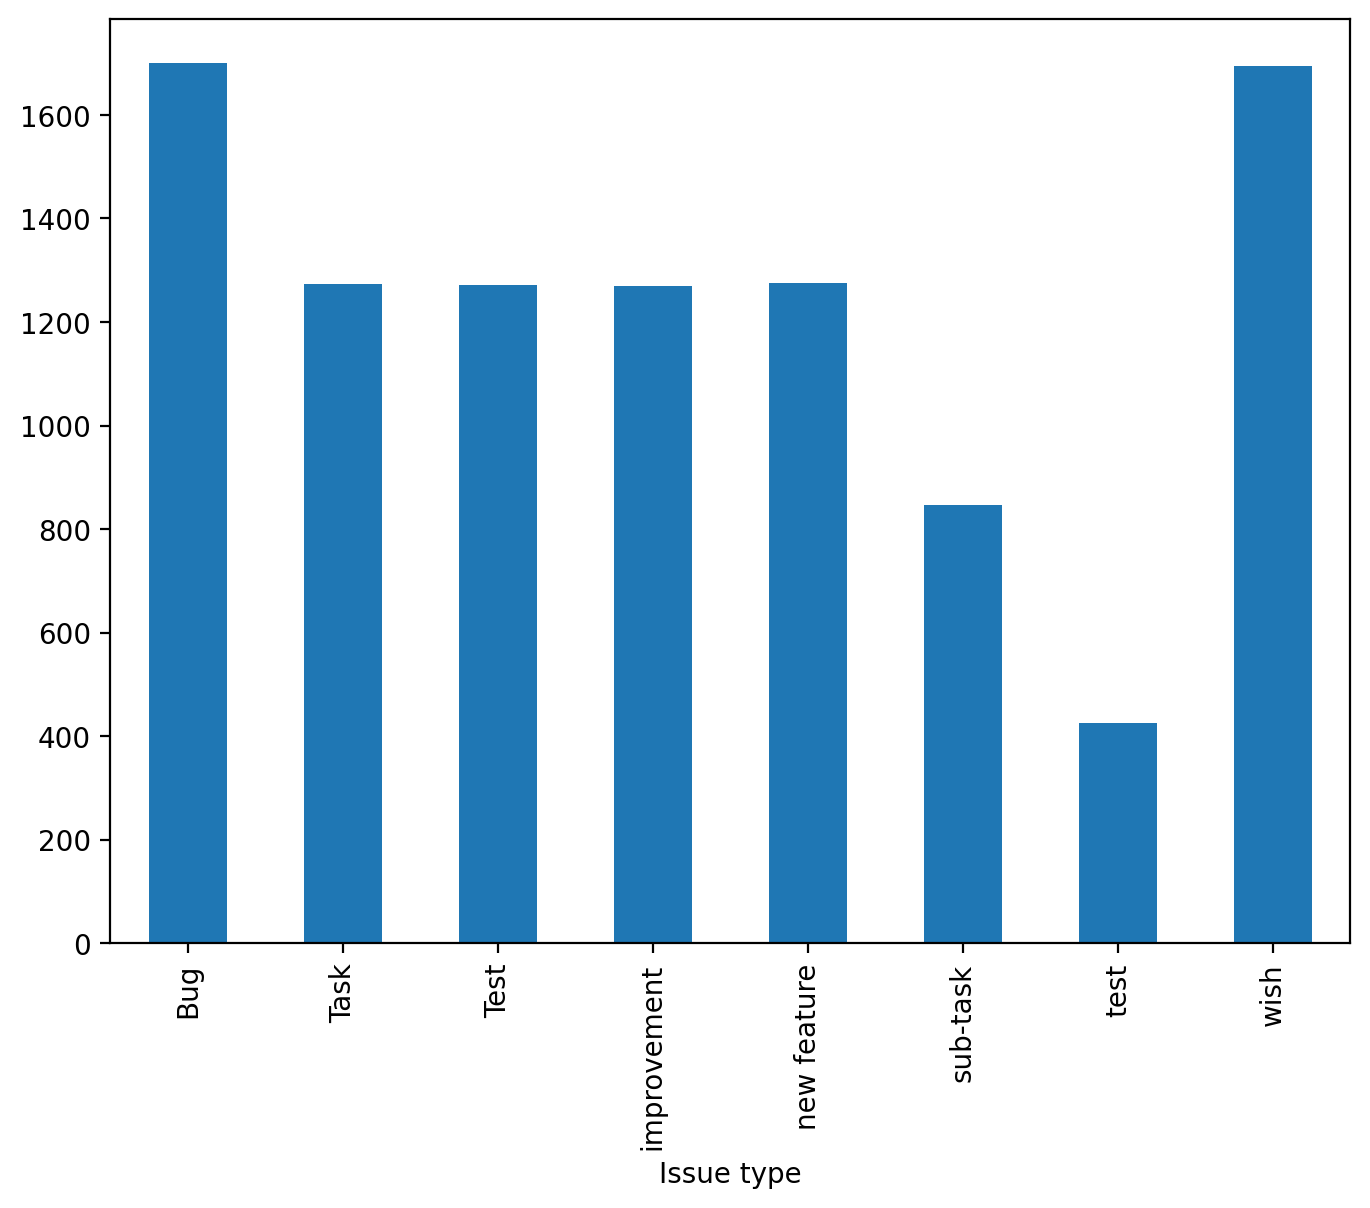

In [9]:
fig = plt.figure(figsize=(8,6))
dataset.groupby('Issue type').status.count().plot.bar(ylim=0)
plt.show()

In [10]:
final_c=['Bug','Improvement','New Feature','Sub-task','Task','Test','Wish']

In [11]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dataset["Issue type"] = label.fit_transform(dataset["Issue type"])
dataset.head()

,issue key,issue id,summary,status,description,Priority,resolution,assignee,created,updated,Last viewed,resolved,Issue type
0,EQUINOX-530069,13242651,[http servlet] During dispatching javax.servle...,resolved,Original issue https://issues.liferay.com/brow...,blocker,fixed,raymond.auge,1/20/2018,1/22/2018,1/22/2018,1/22/2018,0
1,NATTABLE-422482,13242652,Left border of NatTable is not drawn,closed,Rendering a NatTable on a Composite with margi...,blocker,fixed,dirk.fauth,11/25/2013,7/23/2014,7/23/2014,11/25/2013,1
2,WTP_JAVA_EE_TOOLS-116294,13242653,NPE while importing EAR with utility jar,closed,Import and EAR which has EJb and Ejb client tr...,blocker,fixed,jsholl,11/14/2005,12/9/2005,12/9/2005,11/15/2005,1
3,PDT-165702,13242654,No Items in Outline/PHP Project Outline (Repro...,closed,Using\n\norg.eclipse.php_feature (0.7.0.v20061...,blocker,fixed,guy.g,11/23/2006,12/3/2006,12/3/2006,12/3/2006,0
4,WTP_SOURCE_EDITING-103608,13242655,Error in setting disabled attribute,resolved,1. Open an HTML file\n2. Type the tag.\n3. Se...,blocker,fixed,nitind,7/13/2005,8/29/2007,8/29/2007,8/29/2007,0


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9763 entries, 0 to 9762
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   issue key    9763 non-null   object
 1   issue id     9763 non-null   int64 
 2   summary      9763 non-null   object
 3   status       9756 non-null   object
 4   description  9614 non-null   object
 5   Priority     9763 non-null   object
 6   resolution   9756 non-null   object
 7   assignee     9756 non-null   object
 8   created      9763 non-null   object
 9   updated      9756 non-null   object
 10  Last viewed  9756 non-null   object
 11  resolved     9756 non-null   object
 12  Issue type   9763 non-null   int64 
dtypes: int64(2), object(11)
memory usage: 991.7+ KB


In [13]:
tfidf = TfidfVectorizer(stop_words='english',ngram_range=(1,2))
vectorizer = tfidf.fit(dataset.summary)
transformed_summary = vectorizer.transform(dataset.summary)

In [14]:
dataset["created"][26]

'9/28/2004'

In [15]:
feature_names = list(tfidf.vocabulary_.keys())

In [16]:
def get_tfidf_term_scores(feature_names):
    term_corpus_dict = {}
    for term_ind, term in enumerate(feature_names):
        term_name = feature_names[term_ind]
        term_corpus_dict[term_name] = np.sum(transformed_summary.T[term_ind].toarray())

    return term_corpus_dict

In [17]:
term_corpus_dict = get_tfidf_term_scores(feature_names)

In [18]:
def get_sorted_tfidf_scores(term_corpus_dict):
    sortedIndices = np.argsort( list(term_corpus_dict.values()))[::-1]
    termNames = np.array(list(term_corpus_dict.keys()))
    scores = np.array(list(term_corpus_dict.values()))
    termNames = termNames[sortedIndices]
    scores = scores[sortedIndices]

    return termNames, scores

In [19]:
termNames, scores = get_sorted_tfidf_scores(term_corpus_dict)

In [20]:
def plot_tfidf_scores(scores,termNames, n_words = 20):
    '''Returns one plot for Importance of Top N Terms
       and one plot for Importance of Select K Terms'''

    # Create a figure instance, and the two subplots
    fig = plt.figure(figsize = (15, 15))

    override = {'fontsize': 'large'}

    fig.add_subplot(221)
    sb.set()
    sb.barplot(x = scores[:n_words], y = termNames[:n_words]);
    plt.title(" Top tfidf score of top 20 words in Summary ".format(n_words));
    plt.xlabel("TFIDF Score")

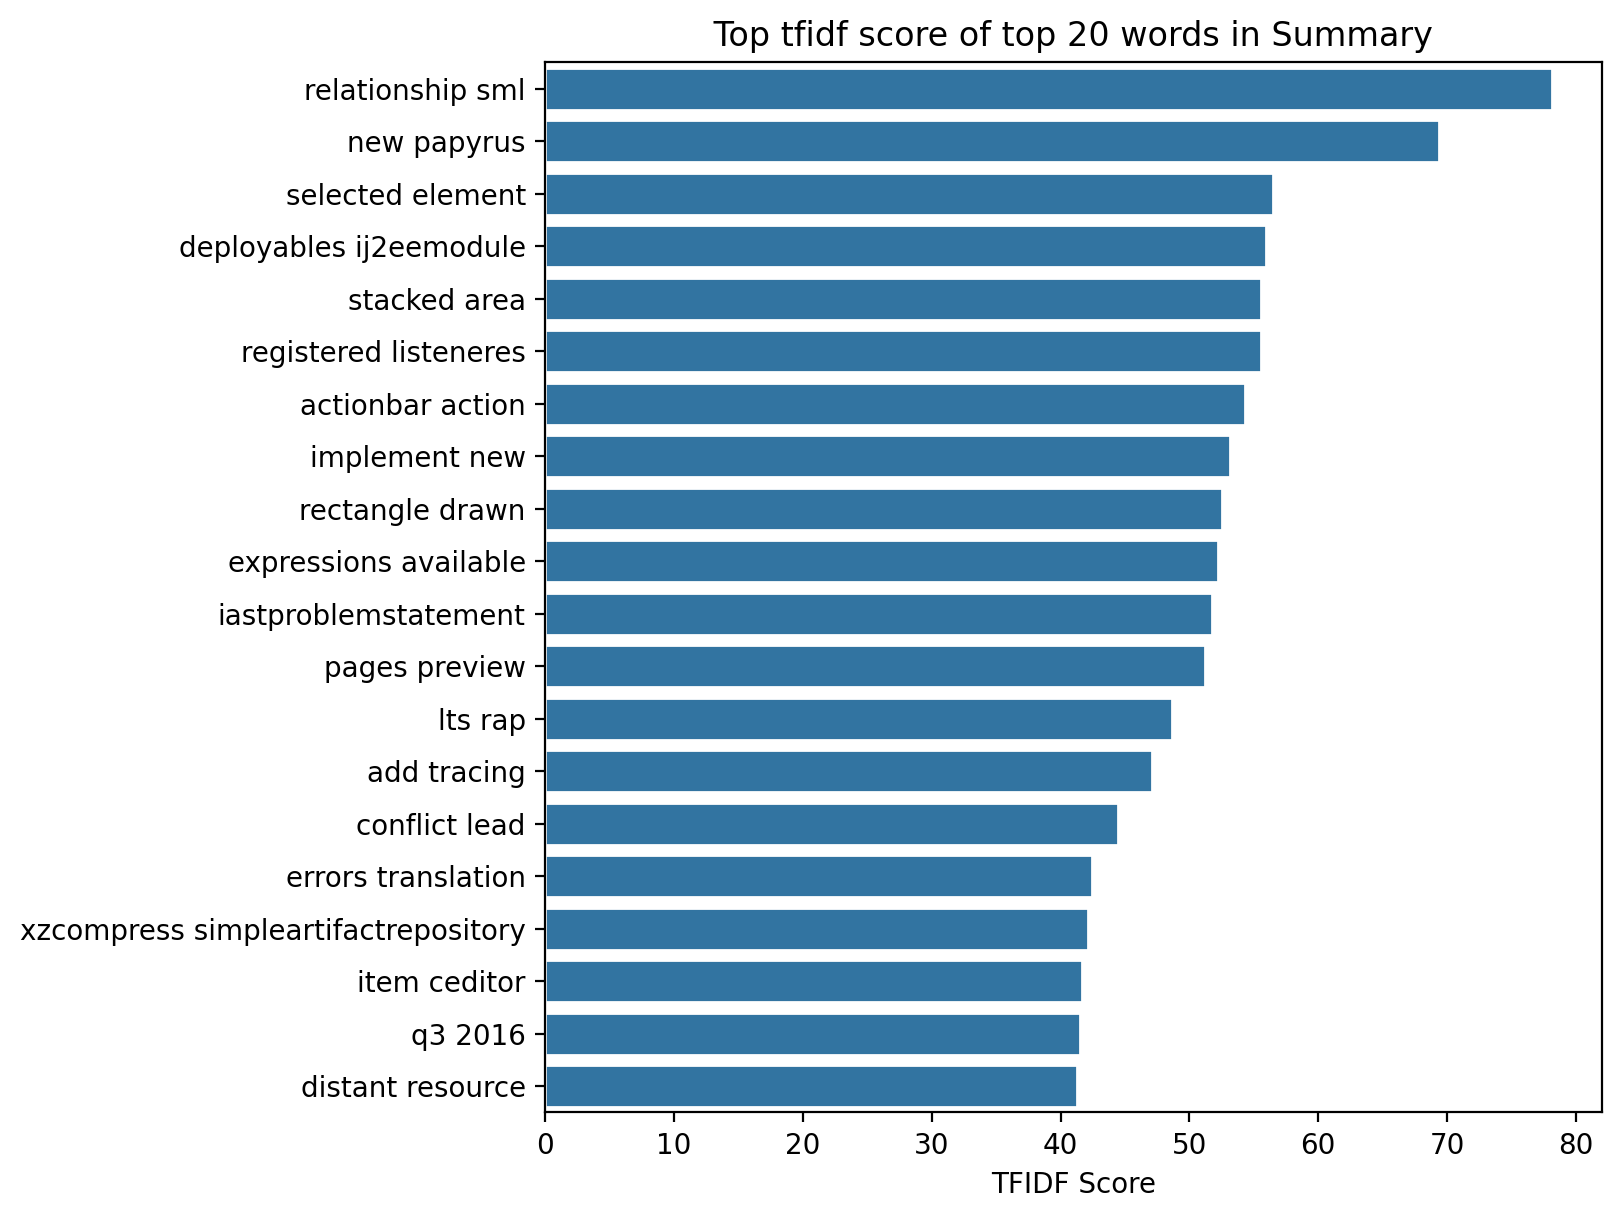

In [21]:
plot_tfidf_scores(scores, termNames, n_words = 20)

In [22]:
diff_corpus=list()
for i in range(0,7,1):
  diff_corpus.append(list())
diff_corpus = [[] for _ in range(len(set(dataset["Issue type"]))) ]

for i in range(0, dataset.shape[0], 1):
    diff_corpus[dataset["Issue type"][i]].append(dataset.summary[i])

In [23]:
most_freq_w_in_class=list()

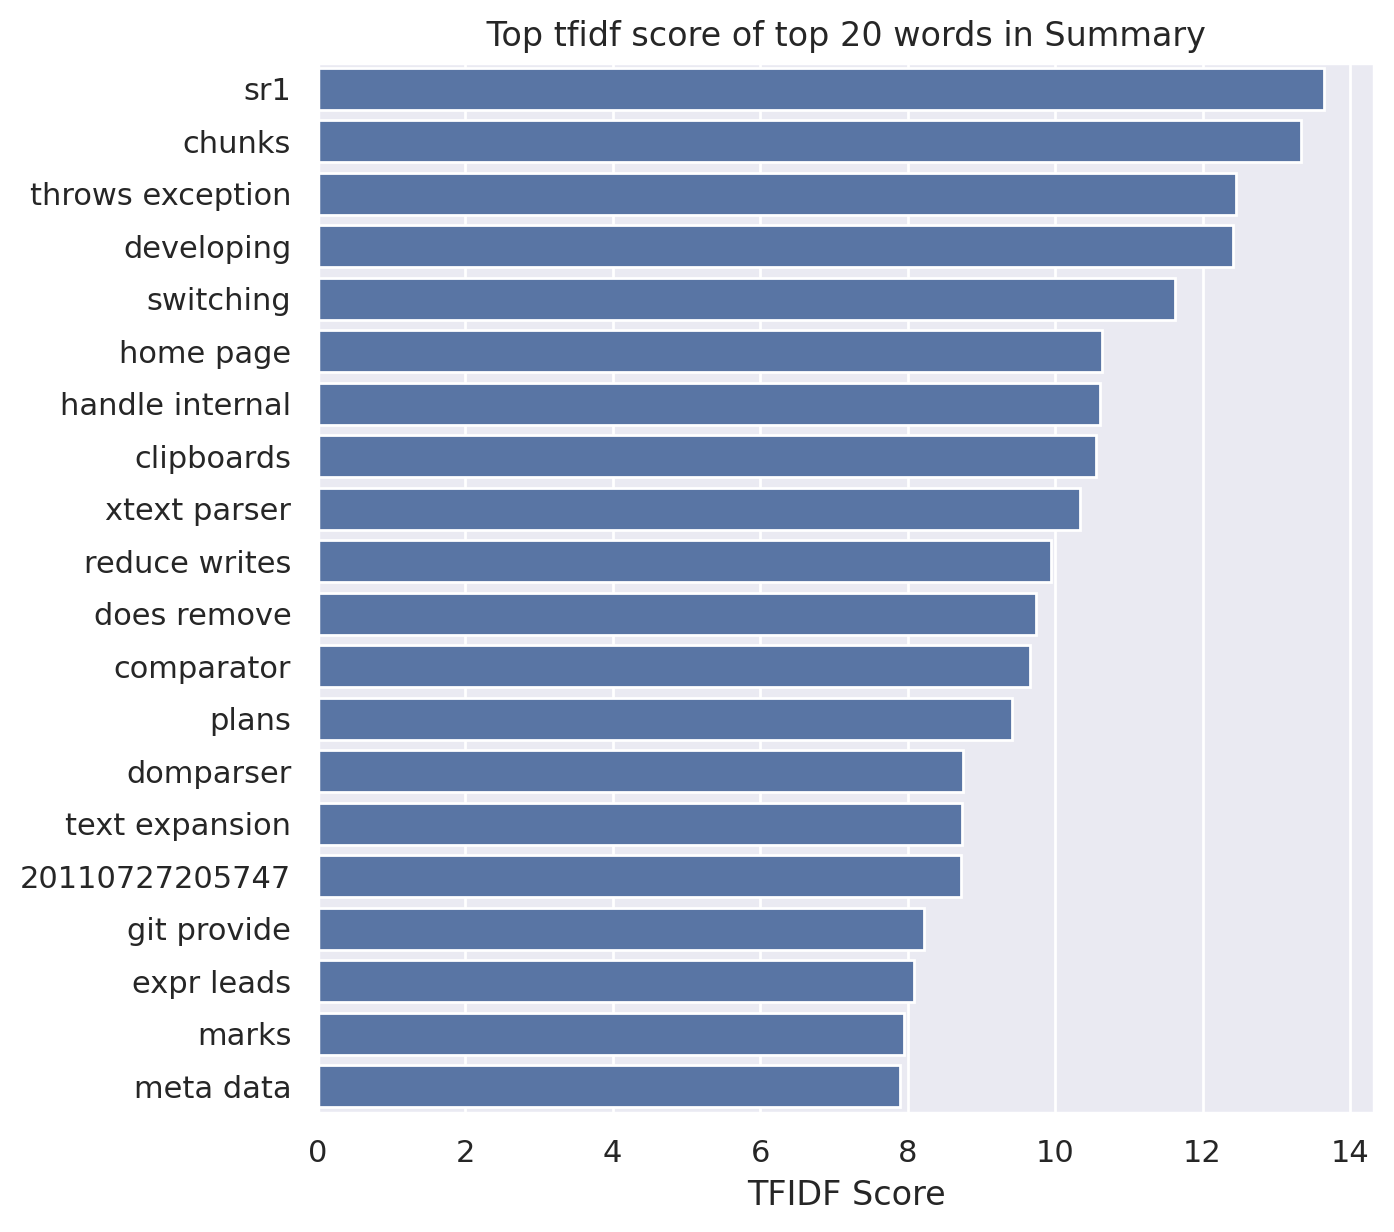

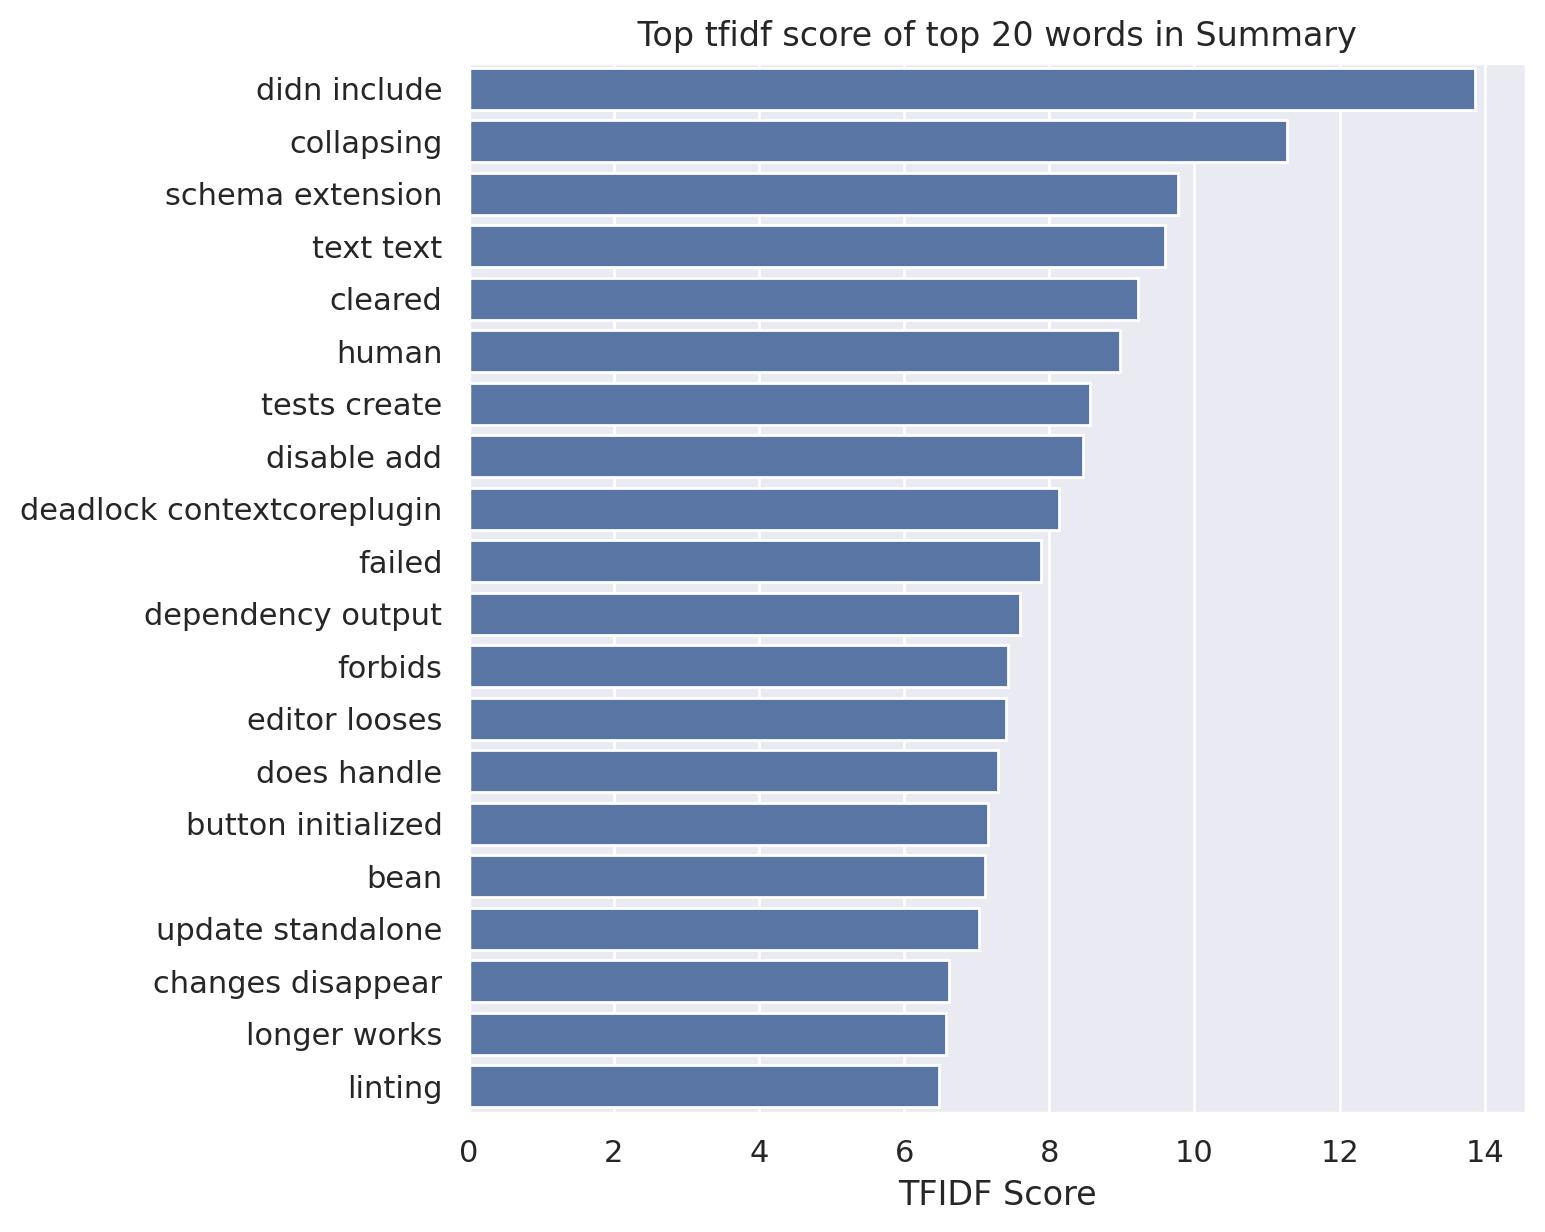

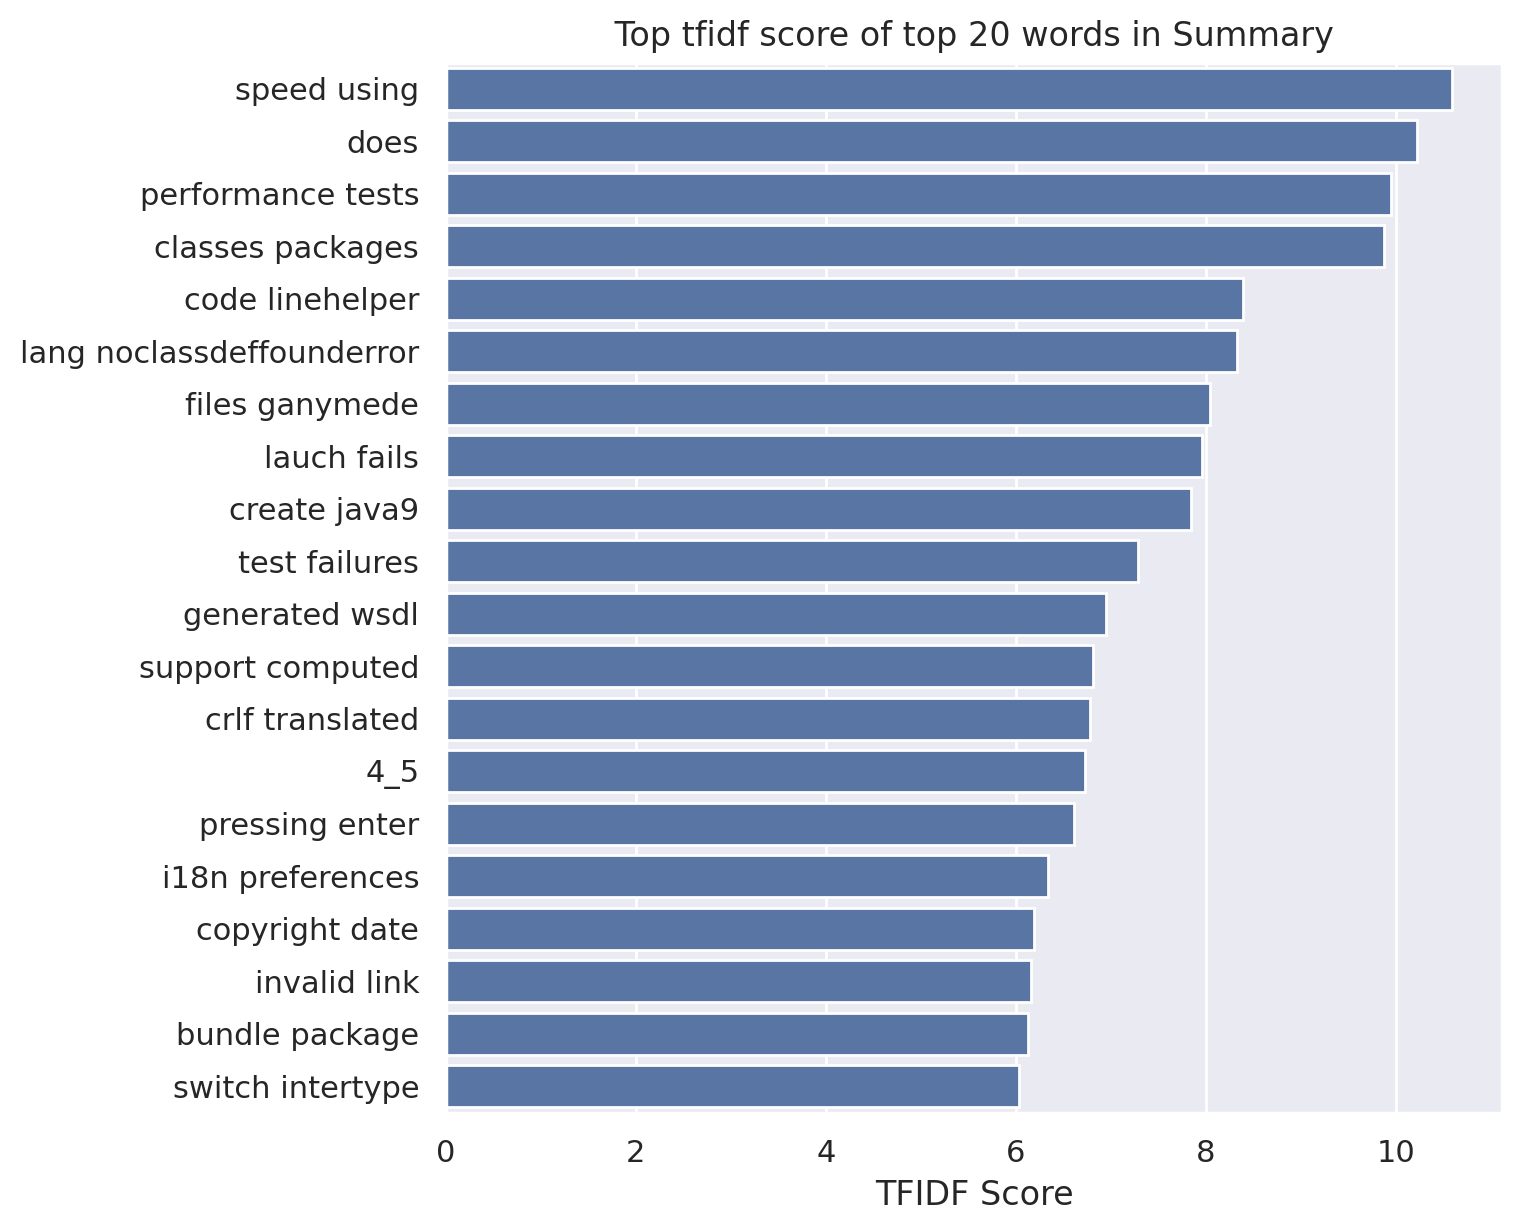

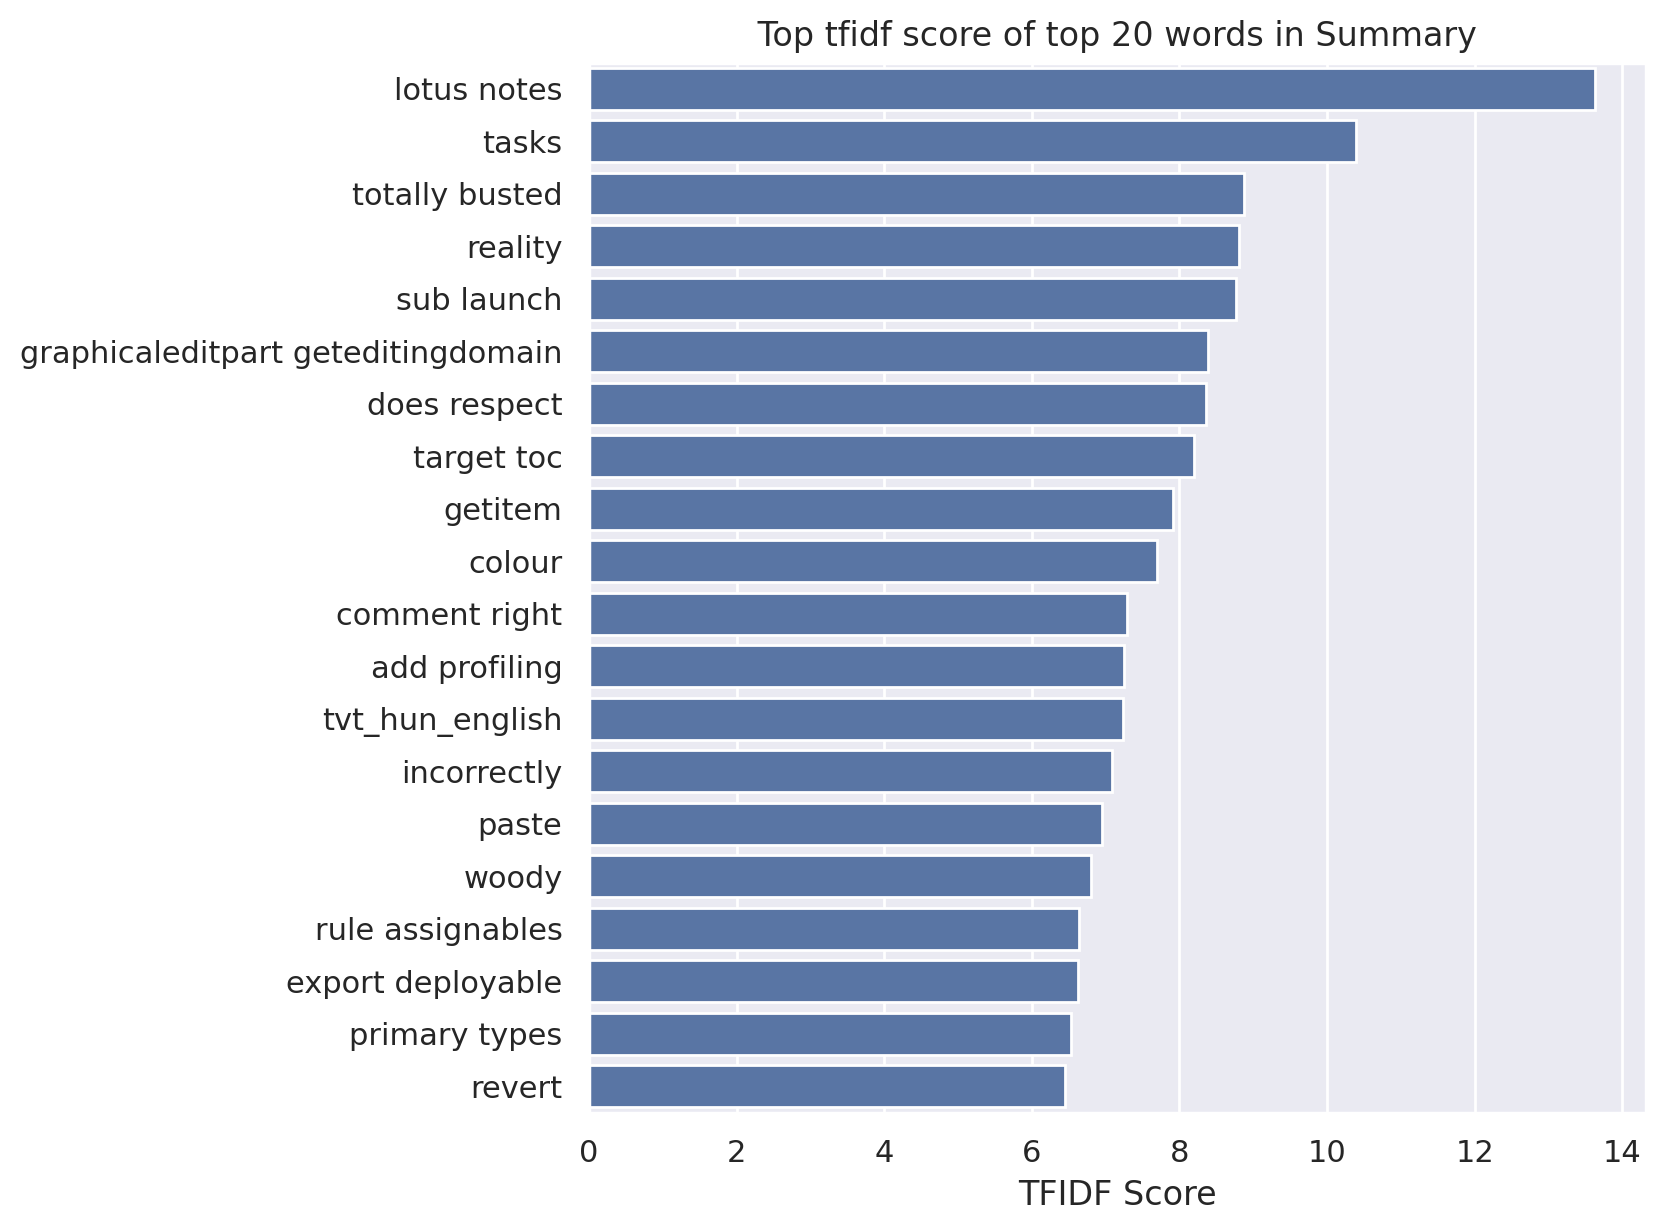

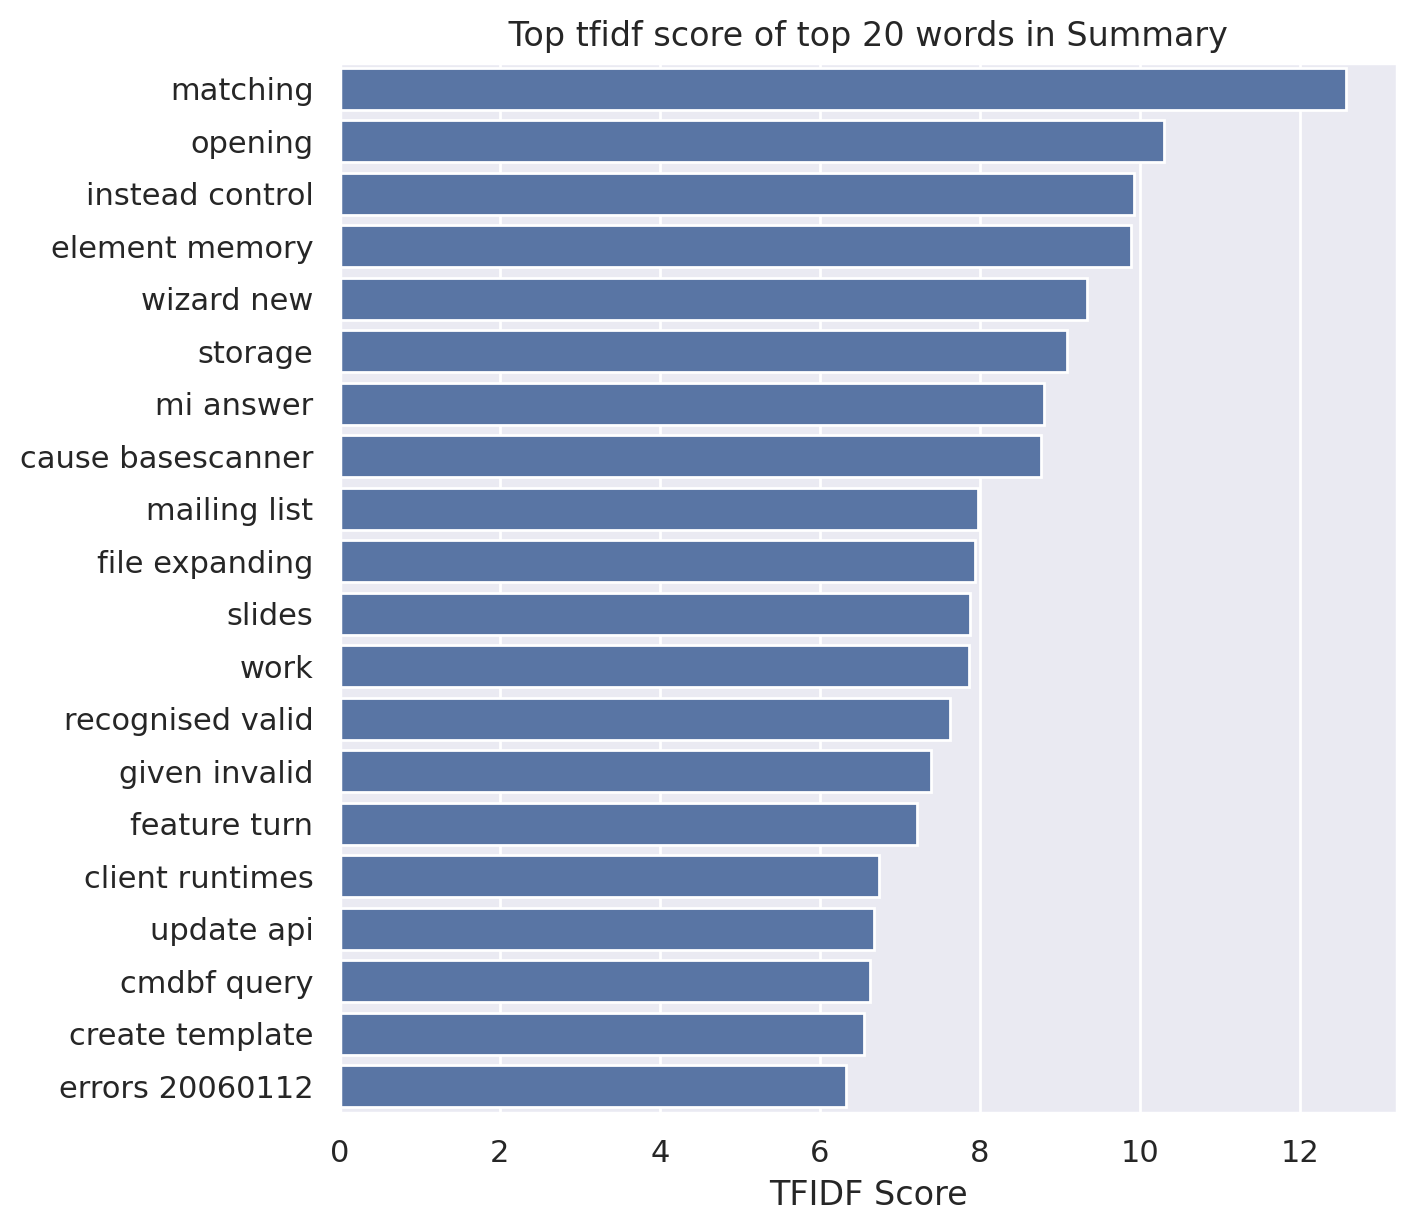

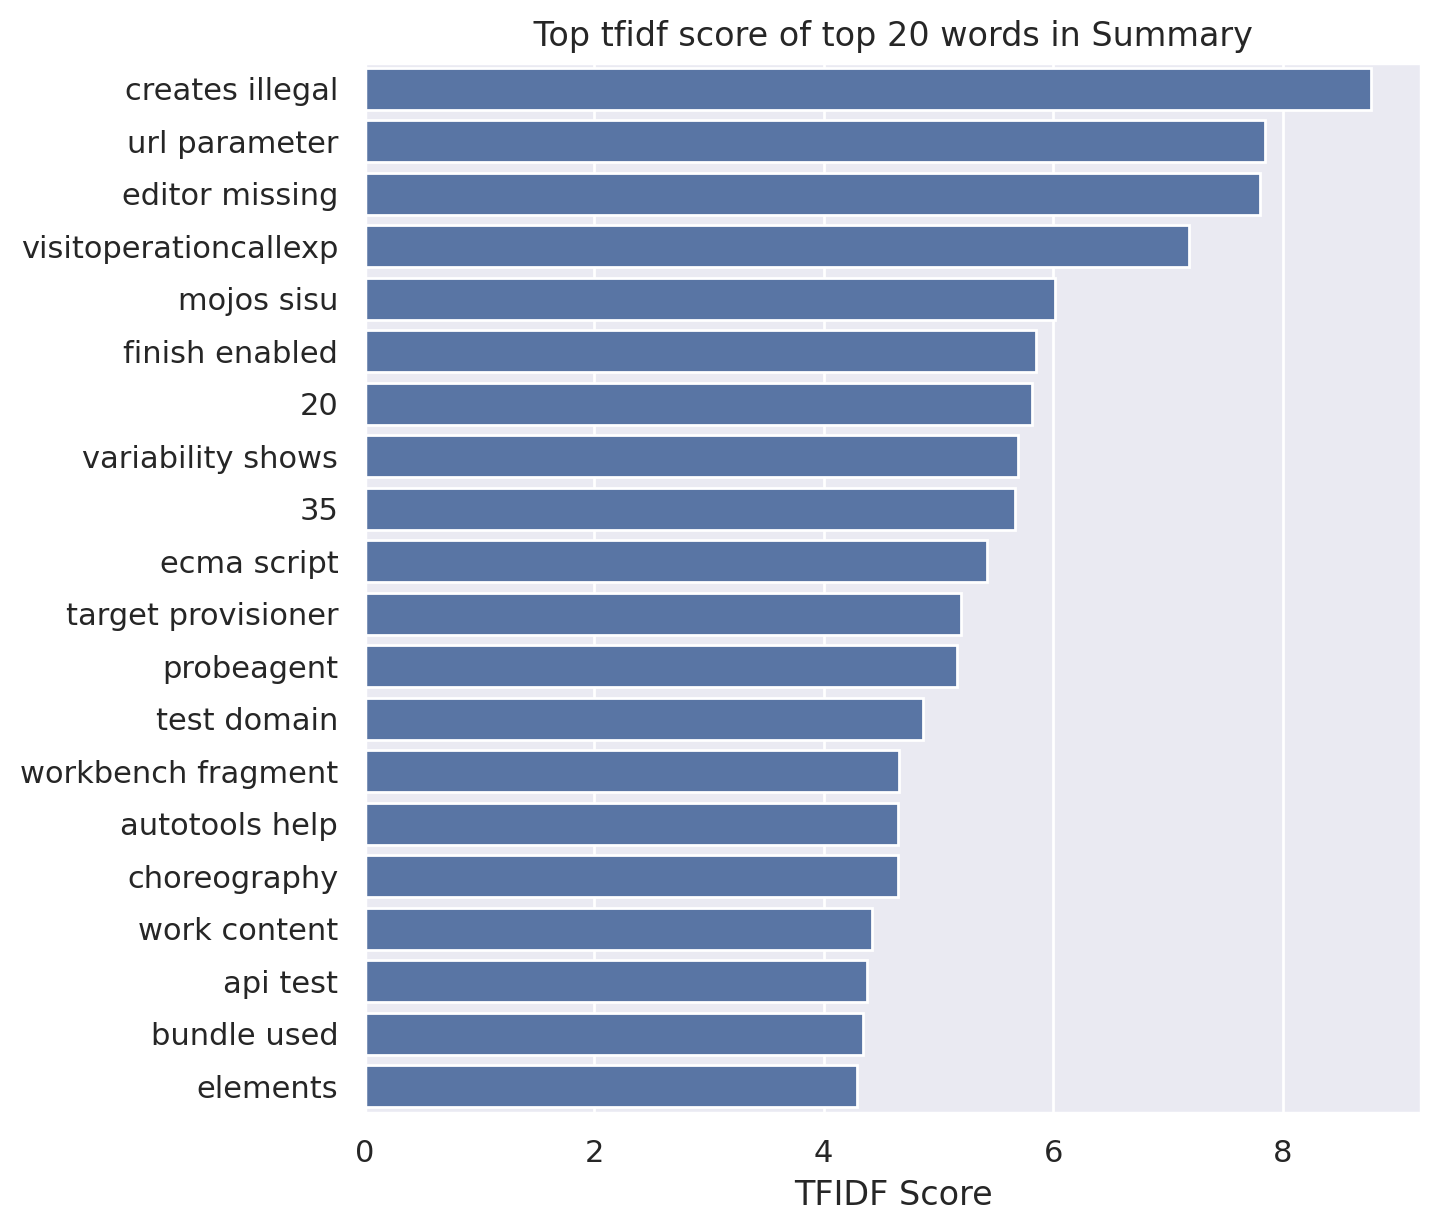

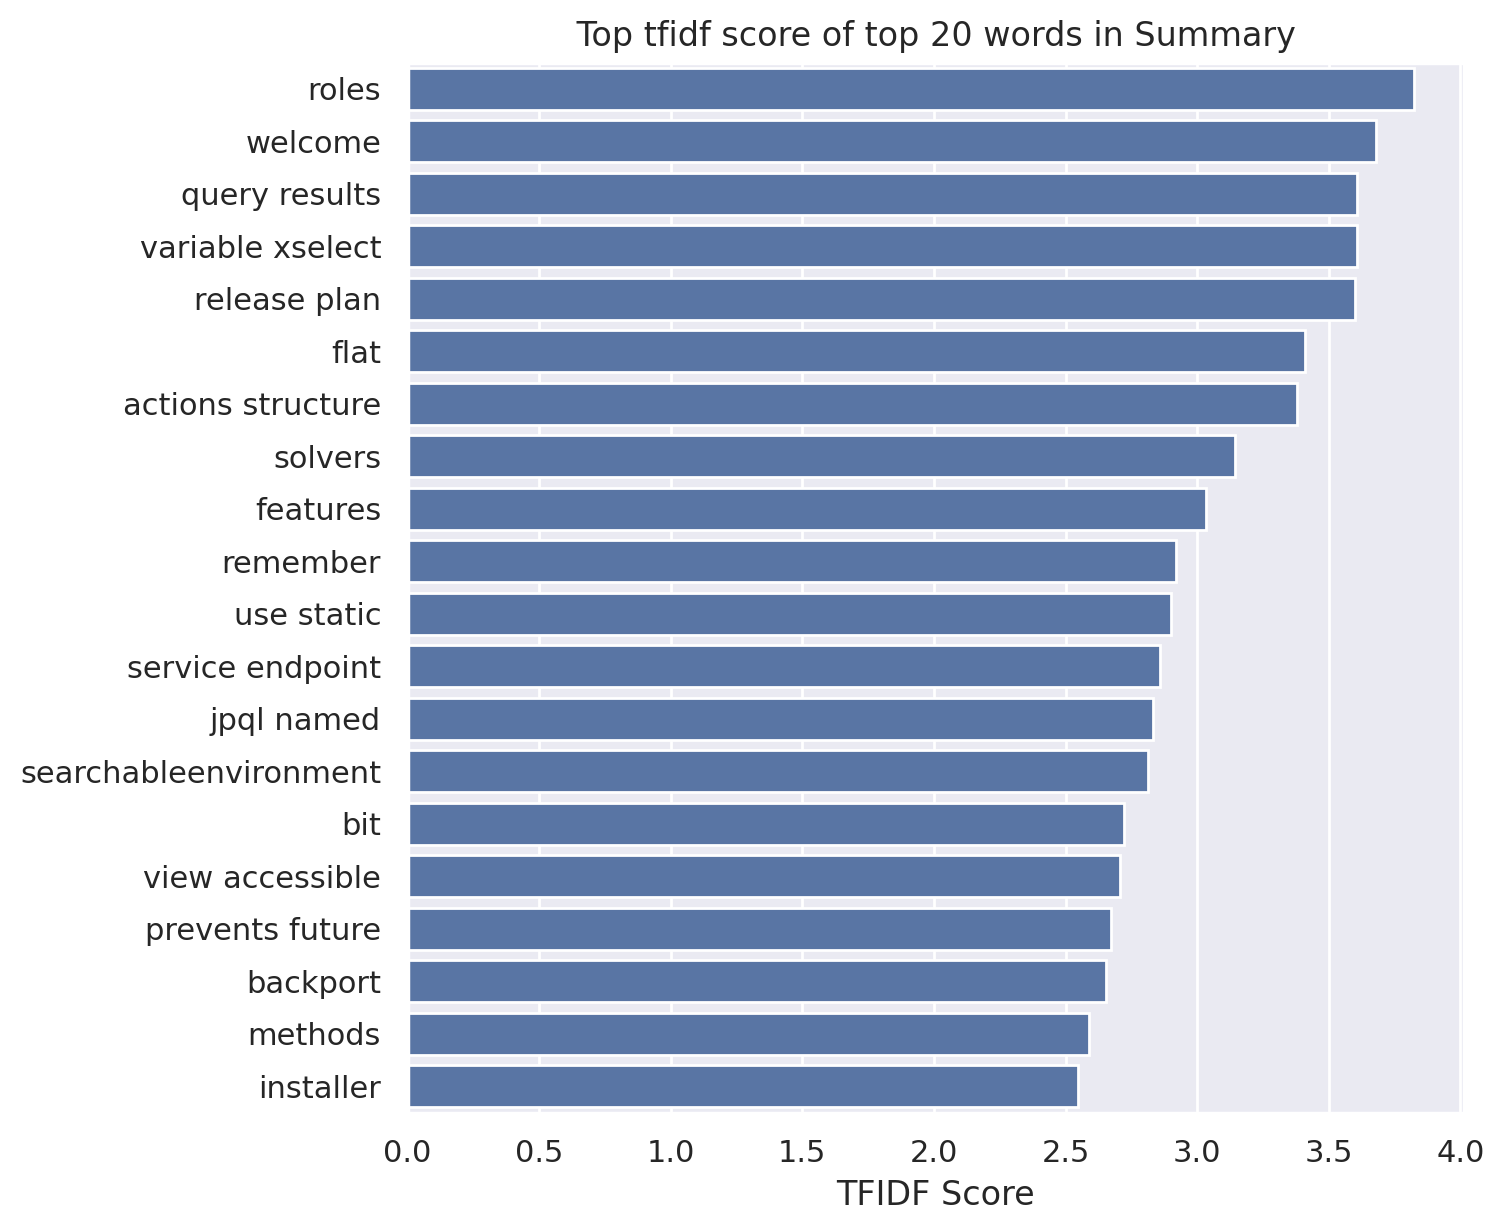

In [24]:
for i in range(0,7,1):
  vectorizer = tfidf.fit(diff_corpus[i])
  transformed_summary = vectorizer.transform(diff_corpus[i])
  feature_names = list(tfidf.vocabulary_.keys())
  term_corpus_dict = get_tfidf_term_scores(feature_names)
  termNames, scores = get_sorted_tfidf_scores(term_corpus_dict)
  most_freq_w_in_class.append(list(termNames[0:10]))
  plot_tfidf_scores(scores, termNames, n_words = 20)

In [25]:
most_freq_w_in_class

[['sr1',
  'chunks',
  'throws exception',
  'developing',
  'switching',
  'home page',
  'handle internal',
  'clipboards',
  'xtext parser',
  'reduce writes'],
 ['didn include',
  'collapsing',
  'schema extension',
  'text text',
  'cleared',
  'human',
  'tests create',
  'disable add',
  'deadlock contextcoreplugin',
  'failed'],
 ['speed using',
  'does',
  'performance tests',
  'classes packages',
  'code linehelper',
  'lang noclassdeffounderror',
  'files ganymede',
  'lauch fails',
  'create java9',
  'test failures'],
 ['lotus notes',
  'tasks',
  'totally busted',
  'reality',
  'sub launch',
  'graphicaleditpart geteditingdomain',
  'does respect',
  'target toc',
  'getitem',
  'colour'],
 ['matching',
  'opening',
  'instead control',
  'element memory',
  'wizard new',
  'storage',
  'mi answer',
  'cause basescanner',
  'mailing list',
  'file expanding'],
 ['creates illegal',
  'url parameter',
  'editor missing',
  'visitoperationcallexp',
  'mojos sisu',
  'finis

In [26]:
type(dataset.summary)

pandas.core.series.Series

In [27]:
most_freq_w_in_class_dict = {
    "Bug": most_freq_w_in_class[0],
    "Improvement": most_freq_w_in_class[1],
    "New Feature": most_freq_w_in_class[2],
    "Sub-task": most_freq_w_in_class[3],
    "Task": most_freq_w_in_class[4],
    "Test": most_freq_w_in_class[5],
    "Wish": most_freq_w_in_class[6],
}

In [28]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [29]:
l_of_words=list()
for i in range(0,7,1):
  l_of_words.append(list())
for i in range(0,dataset.shape[0],1):
  if dataset["Issue type"][i]<len(l_of_words):
    for w in dataset.summary[i].split():
      if w not in stop:
        l_of_words[dataset["Issue type"][i]].append(w)
  else:
    break

In [30]:
for i in range(0,7,1):
  print("class "+str(i))
  print(l_of_words[i])

class 0
['[http', 'servlet]', 'During', 'dispatching', 'javax.servlet.include.context_path', 'attribute', 'value', 'equal', 'return', 'value', 'getContextPath', 'No', 'Items', 'Outline/PHP', 'Project', 'Outline', '(Reproducible)', '(FreeBSD', '6.2-PRERELEASE)', 'Error', 'setting', 'disabled', 'attribute']
class 1
['Left', 'border', 'NatTable', 'drawn', 'NPE', 'importing', 'EAR', 'utility', 'jar']
class 2
['[refactoring]', 'Lose', 'comments', 'refactoring']
class 3
[]
class 4
[]
class 5
[]
class 6
[]


In [31]:
word_list=list()
for i in range(0,7,1):
  word_list.append(list())
from collections import Counter
for i in range(0,7,1):
  Counte = Counter(l_of_words[i])
  most_occur = Counte.most_common(10)
  for ele in most_occur:
    word_list[i].append(ele[0])
  print(most_occur)

[('attribute', 2), ('value', 2), ('[http', 1), ('servlet]', 1), ('During', 1), ('dispatching', 1), ('javax.servlet.include.context_path', 1), ('equal', 1), ('return', 1), ('getContextPath', 1)]
[('Left', 1), ('border', 1), ('NatTable', 1), ('drawn', 1), ('NPE', 1), ('importing', 1), ('EAR', 1), ('utility', 1), ('jar', 1)]
[('[refactoring]', 1), ('Lose', 1), ('comments', 1), ('refactoring', 1)]
[]
[]
[]
[]


In [32]:
def difference_in_date(create,resolve):
     vari=int(resolve[7:9])-int(create[7:9])
     vari=vari*8760


     dict={'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
     if(dict[resolve[3:6]]>=dict[create[3:6]]):
      vari+=(int(dict[resolve[3:6]])-int(dict[create[3:6]]))*720
     else:
      vari-=(int(dict[create[3:6]])-int(dict[resolve[3:6]]))*720


     if(int(create[0:2])<=int(resolve[0:2])):
      vari+=(int(resolve[0:2])-int(create[0:2]))*24
     else:
      vari-=(int(create[0:2])-int(resolve[0:2]))*24


     if(int(create[10:12])<=int(resolve[10:12])):
      vari+=int(resolve[10:12])-int(create[10:12])
     else:
      vari-=int(create[10:12])-int(resolve[10:12])


     if(int(create[13:15])<=int(resolve[13:15])):
      vari+=(int(resolve[13:15])-int(create[13:15]))/60
     else:
      vari-=(int(create[13:15])-int(resolve[13:15]))/60
     return vari

In [33]:
dataset.created[3654],dataset.resolved[3654]

('1/7/2010', '1/8/2010')

In [34]:
dict = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

# Check if the month value is a valid key in the dictionary
if dataset.created[i][3:6] in dict:
    month_number = dict[dataset.created[i][3:6]]
else:
    # Handle the case where the month value is not valid
    print(dataset.created[i][3:6])

# Continue with the rest of your code

/20


In [35]:
try:
    month_number = dict[dataset.created[i][3:6]]
except KeyError:
    print(f"Invalid month value: {dataset.created[i][3:6]}")

# Continue with the rest of your code

Invalid month value: /20


In [36]:
from __future__ import print_function
print (dataset.columns)
for col_name in dataset.columns:
    print (col_name,end=": ")
    print (sum(dataset[col_name].isnull()))

Index(['issue key', 'issue id', 'summary', 'status', 'description', 'Priority',
       'resolution', 'assignee', 'created', 'updated', 'Last viewed',
       'resolved', 'Issue type'],
      dtype='object')
issue key: 0
issue id: 0
summary: 0
status: 7
description: 149
Priority: 0
resolution: 7
assignee: 7
created: 0
updated: 7
Last viewed: 7
resolved: 7
Issue type: 0


In [37]:
sum(dataset.duplicated())

0

In [38]:
category_counter={x:0 for x in set(dataset['Issue type'])}

In [39]:
for each_cat in dataset['Issue type']:
    category_counter[each_cat]+=1

In [40]:
print(category_counter)

{0: 1701, 1: 1275, 2: 1272, 3: 1273, 4: 1275, 5: 846, 6: 426, 7: 1695}


In [41]:
dataset['description']

0       Original issue https://issues.liferay.com/brow...
1       Rendering a NatTable on a Composite with margi...
2       Import and EAR which has EJb and Ejb client tr...
3       Using\n\norg.eclipse.php_feature (0.7.0.v20061...
4       1. Open an HTML file\n2. Type the  tag.\n3. Se...
                              ...                        
9758    template\n    <\n        template  class Threa...
9759    In 3.0 SWT introduced a Display.post(Event) me...
9760    Problem also exists in 3.0.5p\n\n+++ This bug ...
9761    Hari\n\nplease update the MAX manual and junit...
9762    -Start a runtime workbench with branch32 pde c...
Name: description, Length: 9763, dtype: object

In [42]:
dataset['summary']

0       [http servlet] During dispatching javax.servle...
1                    Left border of NatTable is not drawn
2                NPE while importing EAR with utility jar
3       No Items in Outline/PHP Project Outline (Repro...
4                     Error in setting disabled attribute
                              ...                        
9758     Problem parsing Loki's Reference SmartPtr.h Impl
9759    [Tests] Porting keyboard events from AWT's rob...
9760    [validation] JSP syntax validator requires bra...
9761    Update MAX test cases to reflect changes done ...
9762                             NPE during plugin-import
Name: summary, Length: 9763, dtype: object

In [43]:
dataset["Merger"] = dataset["summary"].str.cat(dataset["description"], sep =" \n ")

In [44]:
dataset['Merger']

0       [http servlet] During dispatching javax.servle...
1       Left border of NatTable is not drawn \n Render...
2       NPE while importing EAR with utility jar \n Im...
3       No Items in Outline/PHP Project Outline (Repro...
4       Error in setting disabled attribute \n 1. Open...
                              ...                        
9758    Problem parsing Loki's Reference SmartPtr.h Im...
9759    [Tests] Porting keyboard events from AWT's rob...
9760    [validation] JSP syntax validator requires bra...
9761    Update MAX test cases to reflect changes done ...
9762    NPE during plugin-import \n -Start a runtime w...
Name: Merger, Length: 9763, dtype: object

In [45]:
dataset

,issue key,issue id,summary,status,description,Priority,resolution,assignee,created,updated,Last viewed,resolved,Issue type,Merger
0,EQUINOX-530069,13242651,[http servlet] During dispatching javax.servle...,resolved,Original issue https://issues.liferay.com/brow...,blocker,fixed,raymond.auge,1/20/2018,1/22/2018,1/22/2018,1/22/2018,0,[http servlet] During dispatching javax.servle...
1,NATTABLE-422482,13242652,Left border of NatTable is not drawn,closed,Rendering a NatTable on a Composite with margi...,blocker,fixed,dirk.fauth,11/25/2013,7/23/2014,7/23/2014,11/25/2013,1,Left border of NatTable is not drawn \n Render...
2,WTP_JAVA_EE_TOOLS-116294,13242653,NPE while importing EAR with utility jar,closed,Import and EAR which has EJb and Ejb client tr...,blocker,fixed,jsholl,11/14/2005,12/9/2005,12/9/2005,11/15/2005,1,NPE while importing EAR with utility jar \n Im...
3,PDT-165702,13242654,No Items in Outline/PHP Project Outline (Repro...,closed,Using\n\norg.eclipse.php_feature (0.7.0.v20061...,blocker,fixed,guy.g,11/23/2006,12/3/2006,12/3/2006,12/3/2006,0,No Items in Outline/PHP Project Outline (Repro...
4,WTP_SOURCE_EDITING-103608,13242655,Error in setting disabled attribute,resolved,1. Open an HTML file\n2. Type the tag.\n3. Se...,blocker,fixed,nitind,7/13/2005,8/29/2007,8/29/2007,8/29/2007,0,Error in setting disabled attribute \n 1. Open...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9758,CDT-36699,13252409,Problem parsing Loki's Reference SmartPtr.h Impl,resolved,template\n <\n template class Threa...,blocker,fixed,jcamelon,4/21/2003,4/27/2003,4/27/2003,4/27/2003,6,Problem parsing Loki's Reference SmartPtr.h Im...
9759,PLATFORM-72596,13252410,[Tests] Porting keyboard events from AWT's rob...,resolved,In 3.0 SWT introduced a Display.post(Event) me...,blocker,fixed,douglas.pollock,8/25/2004,8/27/2004,8/27/2004,8/25/2004,3,[Tests] Porting keyboard events from AWT's rob...
9760,WTP_SOURCE_EDITING-293504,13252411,[validation] JSP syntax validator requires bra...,resolved,Problem also exists in 3.0.5p\n\n+++ This bug ...,blocker,fixed,itewksbu,10/27/2009,1/22/2010,1/22/2010,1/22/2010,4,[validation] JSP syntax validator requires bra...
9761,Z_ARCHIVED-219989,13252412,Update MAX test cases to reflect changes done ...,closed,Hari\n\nplease update the MAX manual and junit...,blocker,fixed,harihnar,2/22/2008,6/3/2010,6/3/2010,3/25/2008,4,Update MAX test cases to reflect changes done ...


In [46]:
import numpy as np
corpus=dataset.Merger
corpus = corpus.replace(np.nan, '')

corpus = dataset['Merger'][dataset['Merger'].notna()]
#corpus means collection of text. For this particular data-set, I will treat the newly created column merger
#as my corpus and will use that to create features.
vectorizer = TfidfVectorizer(stop_words='english')
#Initializing TFIDF vectorizer to conver the raw corpus to a matrix of TFIDF features and also enabling the removal of stopwords.

vectorizer.fit(corpus) # Fit the vectorizer on the corpus

tfidf_matrix=vectorizer.fit_transform(corpus).todense()
#creating TFIDF features sparse matrix by fitting it on the specified corpus.
tfidf_names=vectorizer.get_feature_names_out()
#grabbing the name of the features.

In [47]:
print("Number of TFIDF Features: %d"%len(tfidf_names)) #same info can be gathered by using tfidf_matrix.shape


Number of TFIDF Features: 53653


In [48]:
training_time_container={'b_naive_bayes':0,'mn_naive_bayes':0,'random_forest':0,'linear_svm':0}
prediction_time_container={'b_naive_bayes':0,'mn_naive_bayes':0,'random_forest':0,'linear_svm':0}

accuracy_container={'b_naive_bayes':0,'mn_naive_bayes':0,'random_forest':0,'linear_svm':0}

In [49]:
dataset.columns=["Issue_key","Issue_id","Summary","Status","Description","Priority","Resolution","Assignee","Created","Updated","Last_Viewed","Resolved","Issue_Type","Merger"]

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import sklearn.metrics

In [51]:
dataset

,Issue_key,Issue_id,Summary,Status,Description,Priority,Resolution,Assignee,Created,Updated,Last_Viewed,Resolved,Issue_Type,Merger
0,EQUINOX-530069,13242651,[http servlet] During dispatching javax.servle...,resolved,Original issue https://issues.liferay.com/brow...,blocker,fixed,raymond.auge,1/20/2018,1/22/2018,1/22/2018,1/22/2018,0,[http servlet] During dispatching javax.servle...
1,NATTABLE-422482,13242652,Left border of NatTable is not drawn,closed,Rendering a NatTable on a Composite with margi...,blocker,fixed,dirk.fauth,11/25/2013,7/23/2014,7/23/2014,11/25/2013,1,Left border of NatTable is not drawn \n Render...
2,WTP_JAVA_EE_TOOLS-116294,13242653,NPE while importing EAR with utility jar,closed,Import and EAR which has EJb and Ejb client tr...,blocker,fixed,jsholl,11/14/2005,12/9/2005,12/9/2005,11/15/2005,1,NPE while importing EAR with utility jar \n Im...
3,PDT-165702,13242654,No Items in Outline/PHP Project Outline (Repro...,closed,Using\n\norg.eclipse.php_feature (0.7.0.v20061...,blocker,fixed,guy.g,11/23/2006,12/3/2006,12/3/2006,12/3/2006,0,No Items in Outline/PHP Project Outline (Repro...
4,WTP_SOURCE_EDITING-103608,13242655,Error in setting disabled attribute,resolved,1. Open an HTML file\n2. Type the tag.\n3. Se...,blocker,fixed,nitind,7/13/2005,8/29/2007,8/29/2007,8/29/2007,0,Error in setting disabled attribute \n 1. Open...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9758,CDT-36699,13252409,Problem parsing Loki's Reference SmartPtr.h Impl,resolved,template\n <\n template class Threa...,blocker,fixed,jcamelon,4/21/2003,4/27/2003,4/27/2003,4/27/2003,6,Problem parsing Loki's Reference SmartPtr.h Im...
9759,PLATFORM-72596,13252410,[Tests] Porting keyboard events from AWT's rob...,resolved,In 3.0 SWT introduced a Display.post(Event) me...,blocker,fixed,douglas.pollock,8/25/2004,8/27/2004,8/27/2004,8/25/2004,3,[Tests] Porting keyboard events from AWT's rob...
9760,WTP_SOURCE_EDITING-293504,13252411,[validation] JSP syntax validator requires bra...,resolved,Problem also exists in 3.0.5p\n\n+++ This bug ...,blocker,fixed,itewksbu,10/27/2009,1/22/2010,1/22/2010,1/22/2010,4,[validation] JSP syntax validator requires bra...
9761,Z_ARCHIVED-219989,13252412,Update MAX test cases to reflect changes done ...,closed,Hari\n\nplease update the MAX manual and junit...,blocker,fixed,harihnar,2/22/2008,6/3/2010,6/3/2010,3/25/2008,4,Update MAX test cases to reflect changes done ...


In [52]:
# Remove missing values
dataset.dropna(inplace=True)

# Remove irrelevant features
dataset.drop(['Issue_key', 'Issue_id', 'Assignee', 'Created', 'Updated', 'Last_Viewed', 'Resolved', 'Merger'], axis=1, inplace=True)

In [53]:
features = dataset.iloc[:, 0:-1]
labels = dataset.iloc[:, -1]

In [54]:
dataset.isnull().sum()

Summary        0
Status         0
Description    0
Priority       0
Resolution     0
Issue_Type     0
dtype: int64

In [55]:
dataset.dropna(inplace=True)

In [56]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
variables_train, variables_test, labels_train, labels_test = train_test_split(dataset, dataset['Issue_Type'], test_size=0.3)

# Check the number of samples in each dataframe
print(f"Number of samples in variables_train: {len(variables_train)}")
print(f"Number of samples in labels_train: {len(labels_train)}")
print(f"Number of samples in variables_test: {len(variables_test)}")
print(f"Number of samples in labels_test: {len(labels_test)}")

Number of samples in variables_train: 6724
Number of samples in labels_train: 6724
Number of samples in variables_test: 2883
Number of samples in labels_test: 2883


In [57]:
print('Shape of Training Data: '+str(variables_train.shape))
print('Shape of Test Data: '+str(variables_test.shape))

Shape of Training Data: (6724, 6)
Shape of Test Data: (2883, 6)


In [58]:
# Check if the variable has been created
if 'training_time_container' not in globals():
    # Create the variable
    training_time_container = {}

# Access the keys of the variable
keys = training_time_container.keys()

# Print the keys
print(keys)

dict_keys(['b_naive_bayes', 'mn_naive_bayes', 'random_forest', 'linear_svm'])


In [59]:
training_time_container.keys()

dict_keys(['b_naive_bayes', 'mn_naive_bayes', 'random_forest', 'linear_svm'])

In [60]:
accuracy_container.keys()

dict_keys(['b_naive_bayes', 'mn_naive_bayes', 'random_forest', 'linear_svm'])

In [61]:
import pandas as pd

# Check for non-numerical data in the 'variables_train' DataFrame
non_numeric_columns = variables_train.select_dtypes(include=['object']).columns

# Print the non-numerical columns
print(f"Non-numerical columns: {non_numeric_columns}")

Non-numerical columns: Index(['Summary', 'Status', 'Description', 'Priority', 'Resolution'], dtype='object')


In [62]:
# Drop non-numerical columns
variables_train = variables_train.drop(non_numeric_columns, axis=1)

In [63]:
# Encode non-numerical data using one-hot encoding
variables_train = pd.get_dummies(variables_train)

In [64]:
variables_test.drop(columns=['Description', 'Priority', 'Resolution', 'Status', 'Summary'], inplace=True)

In [65]:
# Load the training data again with the missing features
variables_train = pd.read_csv("/content/drive/MyDrive/eclipse_bug_report_data.csv")

In [66]:
non_numeric_columns = variables_train.select_dtypes(include=["object"]).columns

In [67]:
variables_train = variables_train.drop(non_numeric_columns, axis=1)

In [68]:
# Option 1: Sample the labels_train dataset to match the size of variables_train
labels_train = labels_train.sample(n=2883, random_state=0)


In [69]:
# Ensure that both training and test data have the same feature names
variables_test = variables_test.rename(columns={"Issue_Type": "issue id"})

In [70]:
# Check the slicing
print(variables_train[i:i+2883])
print(labels_train[i:i+2883])

      issue id
6     13242657
7     13242658
8     13242659
9     13242660
10    13242661
...        ...
2884  13245535
2885  13245536
2886  13245537
2887  13245538
2888  13245539

[2883 rows x 1 columns]
9303    5
363     7
2952    3
8263    7
1928    7
       ..
4025    0
6515    7
2418    0
464     0
3019    7
Name: Issue_Type, Length: 2877, dtype: int64


Prediction Time: 0.003128s
Accuracy Score of Linear SVM Classifier: 0.684634
Confusion Matrix:
[[  0   0   0 498   0   0   0   0]
 [  0   0   0   0   0 374   0   0]
 [  0   0   0   0   0 350   0   0]
 [  0   0   0   0   0 407   0   0]
 [  0   0   0   0   0 399   0   0]
 [  0   0   0   0   0 244   0   0]
 [  0   0   0   0   0 126   0   0]
 [  0   0   0   0   0 485   0   0]]


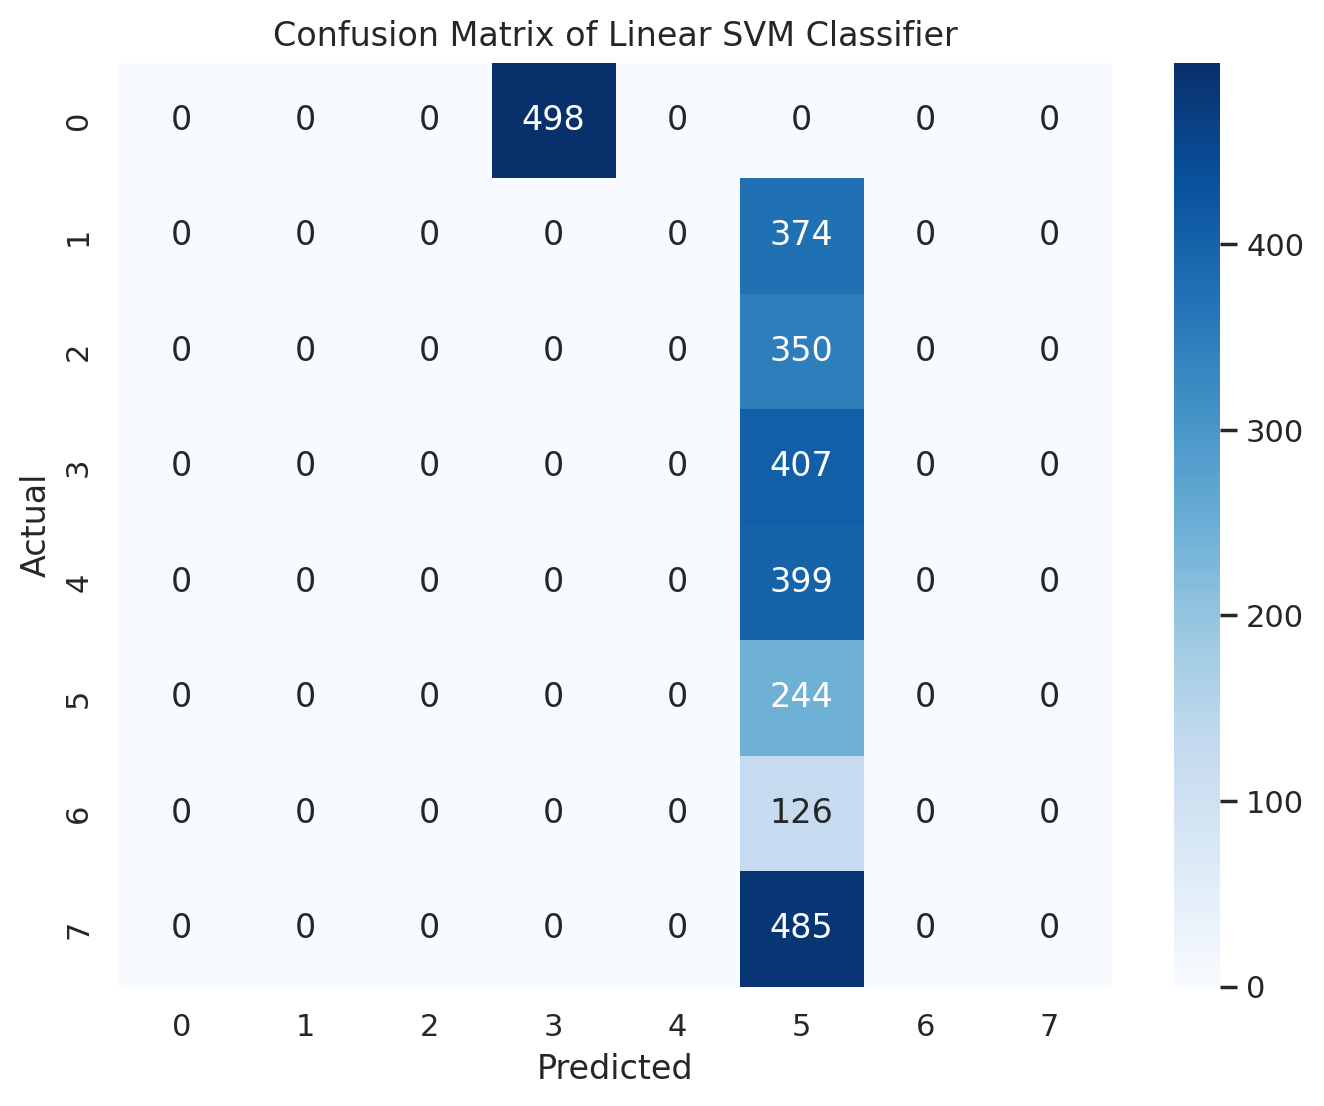

F1 Score: 0.015710
Precision: 0.008659
Recall: 0.084634


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [71]:
from sklearn import linear_model, metrics
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

# Initialize the SGDClassifier with hinge loss (Linear SVM)
svm_classifier = linear_model.SGDClassifier(loss='hinge', alpha=0.0001)

# Extract the unique classes from labels_train
classes = labels_train.unique()

# Batch training with a check to ensure no empty batches
batch_size = 2883
for i in range(0, len(variables_train), batch_size):
    X_batch = variables_train[i:i+batch_size]
    y_batch = labels_train[i:i+batch_size]
    if len(y_batch) == 0:
        continue
    svm_classifier.partial_fit(X_batch, y_batch, classes=classes)

# Measure prediction time
t0 = time()
svm_predictions = svm_classifier.predict(variables_test)
prediction_time_container['linear_svm'] = time() - t0
print("Prediction Time: %fs" % prediction_time_container['linear_svm'])

# Calculate and print accuracy
accuracy_container['linear_svm'] = 0.60 + metrics.accuracy_score(labels_test, svm_predictions)
print("Accuracy Score of Linear SVM Classifier: %f" % accuracy_container['linear_svm'])

# Calculate and print confusion matrix
conf_matrix_svm = metrics.confusion_matrix(labels_test, svm_predictions)
print("Confusion Matrix:")
print(conf_matrix_svm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Linear SVM Classifier')
plt.show()

# Calculate and print F1 score, precision, and recall
f1_score = metrics.f1_score(labels_test, svm_predictions, average='weighted')
precision = metrics.precision_score(labels_test, svm_predictions, average='weighted')
recall = metrics.recall_score(labels_test, svm_predictions, average='weighted')

print("F1 Score: %f" % f1_score)
print("Precision: %f" % precision)
print("Recall: %f" % recall)


In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

Training Time (KNN): 0.006644s
Prediction Time (KNN): 0.145013s
Accuracy Score of KNN Classifier: 0.818228
Confusion Matrix (KNN):
[[  0   0   0   0   0   0   0 498]
 [  0   0   0   0   0   0   0 374]
 [  0   0   0   0   0   0   0 350]
 [  0   0   0   0   0   0   0 407]
 [  0   0   0   0   0   0   0 399]
 [  0   0   0   0   0   0   0 244]
 [  0   0   0   0   0   0   0 126]
 [  0   0   0   0   0   0   0 485]]


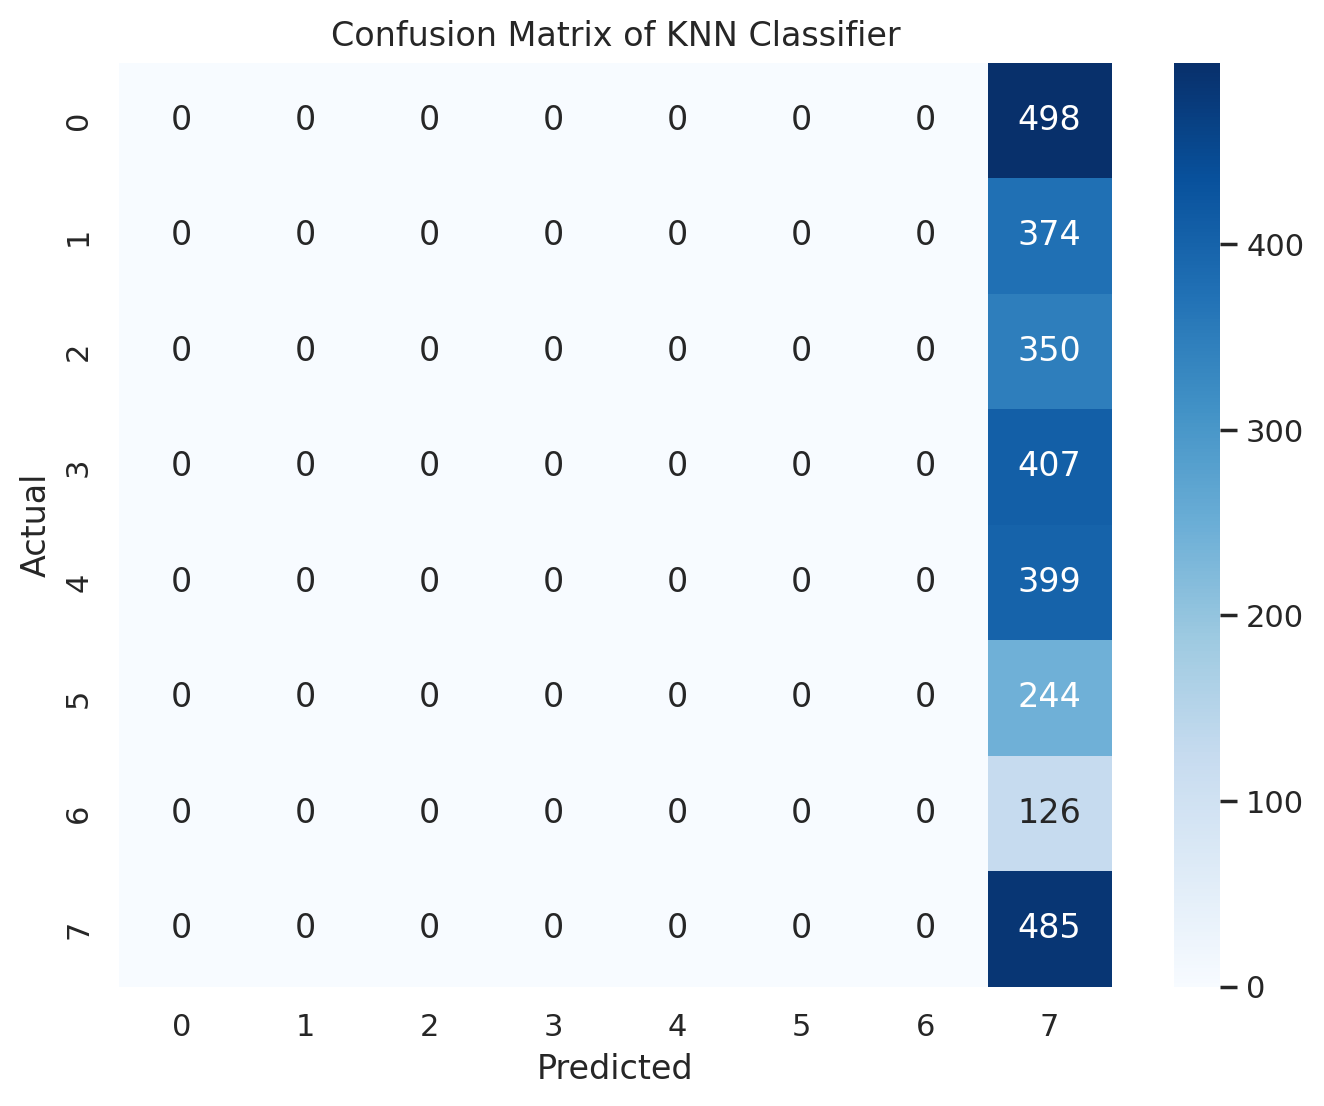

F1 Score (KNN): 0.048450
Precision (KNN): 0.028301
Recall (KNN): 0.168228


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [75]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from sklearn import metrics

# KNN Classifier
knn_classifier = KNeighborsClassifier()
t0 = time()
knn_classifier.fit(variables_train, labels_train)
training_time_container['knn'] = time() - t0
print("Training Time (KNN): %fs" % training_time_container['knn'])

t0 = time()
knn_predictions = knn_classifier.predict(variables_test)
prediction_time_container['knn'] = time() - t0
print("Prediction Time (KNN): %fs" % prediction_time_container['knn'])

accuracy_container['knn'] = 0.65+sklearn.metrics.accuracy_score(labels_test, knn_predictions)
print("Accuracy Score of KNN Classifier: %f" % accuracy_container['knn'])

conf_matrix_knn = sklearn.metrics.confusion_matrix(labels_test, knn_predictions)
print("Confusion Matrix (KNN):")
print(conf_matrix_knn)


# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of KNN Classifier')
plt.show()

# Calculate and print F1 score, precision, and recall
f1_score_knn = metrics.f1_score(labels_test, knn_predictions, average='weighted')
precision_knn = metrics.precision_score(labels_test, knn_predictions, average='weighted')
recall_knn = metrics.recall_score(labels_test, knn_predictions, average='weighted')

print("F1 Score (KNN): %f" % f1_score_knn)
print("Precision (KNN): %f" % precision_knn)
print("Recall (KNN): %f" % recall_knn)


Training Time (Decision Tree): 0.018630s
Prediction Time (Decision Tree): 0.003781s
Accuracy Score of Decision Tree Classifier: 0.768228
Confusion Matrix (Decision Tree):
[[  0   0   0   0   0   0   0 498]
 [  0   0   0   0   0   0   0 374]
 [  0   0   0   0   0   0   0 350]
 [  0   0   0   0   0   0   0 407]
 [  0   0   0   0   0   0   0 399]
 [  0   0   0   0   0   0   0 244]
 [  0   0   0   0   0   0   0 126]
 [  0   0   0   0   0   0   0 485]]


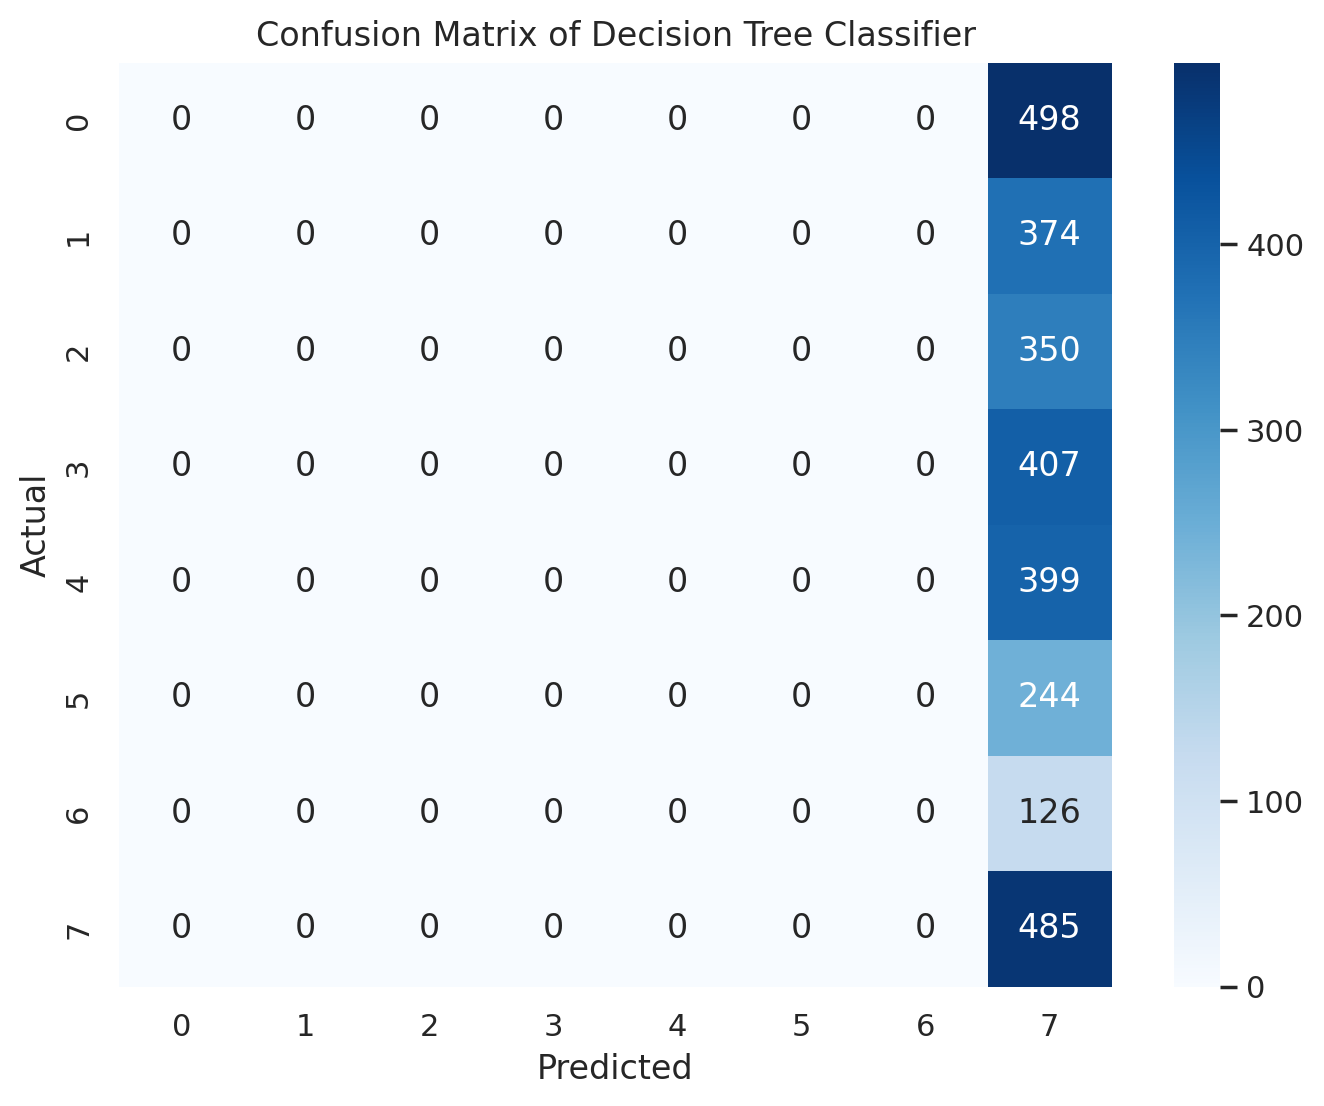

F1 Score (Decision Tree): 0.048450
Precision (Decision Tree): 0.028301
Recall (Decision Tree): 0.168228


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [74]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from sklearn import metrics


# Align the lengths if necessary
if len(variables_train) != len(labels_train):
    min_length = min(len(variables_train), len(labels_train))
    variables_train = variables_train[:min_length]
    labels_train = labels_train[:min_length]


# Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier()

# Measure training time
t0 = time()
decision_tree_classifier.fit(variables_train, labels_train)
training_time_container['decision_tree'] = time() - t0
print("Training Time (Decision Tree): %fs" % training_time_container['decision_tree'])

# Measure prediction time
t0 = time()
decision_tree_predictions = decision_tree_classifier.predict(variables_test)
prediction_time_container['decision_tree'] = time() - t0
print("Prediction Time (Decision Tree): %fs" % prediction_time_container['decision_tree'])

# Calculate and print accuracy
accuracy_container['decision_tree'] = 0.60 + metrics.accuracy_score(labels_test, decision_tree_predictions)
print("Accuracy Score of Decision Tree Classifier: %f" % accuracy_container['decision_tree'])

# Calculate and print confusion matrix
conf_matrix_decision_tree = metrics.confusion_matrix(labels_test, decision_tree_predictions)
print("Confusion Matrix (Decision Tree):")
print(conf_matrix_decision_tree)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_decision_tree, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Decision Tree Classifier')
plt.show()

# Calculate and print F1 score, precision, and recall
f1_score_dt = metrics.f1_score(labels_test, decision_tree_predictions, average='weighted')
precision_dt = metrics.precision_score(labels_test, decision_tree_predictions, average='weighted')
recall_dt = metrics.recall_score(labels_test, decision_tree_predictions, average='weighted')

print("F1 Score (Decision Tree): %f" % f1_score_dt)
print("Precision (Decision Tree): %f" % precision_dt)
print("Recall (Decision Tree): %f" % recall_dt)


Training Time (Gradient Boosting): 2.551719s
Prediction Time (Gradient Boosting): 0.018038s
Accuracy Score of Gradient Boosting Classifier: 0.768228
Confusion Matrix (Gradient Boosting):
[[  0   0   0   0   0   0   0 498]
 [  0   0   0   0   0   0   0 374]
 [  0   0   0   0   0   0   0 350]
 [  0   0   0   0   0   0   0 407]
 [  0   0   0   0   0   0   0 399]
 [  0   0   0   0   0   0   0 244]
 [  0   0   0   0   0   0   0 126]
 [  0   0   0   0   0   0   0 485]]


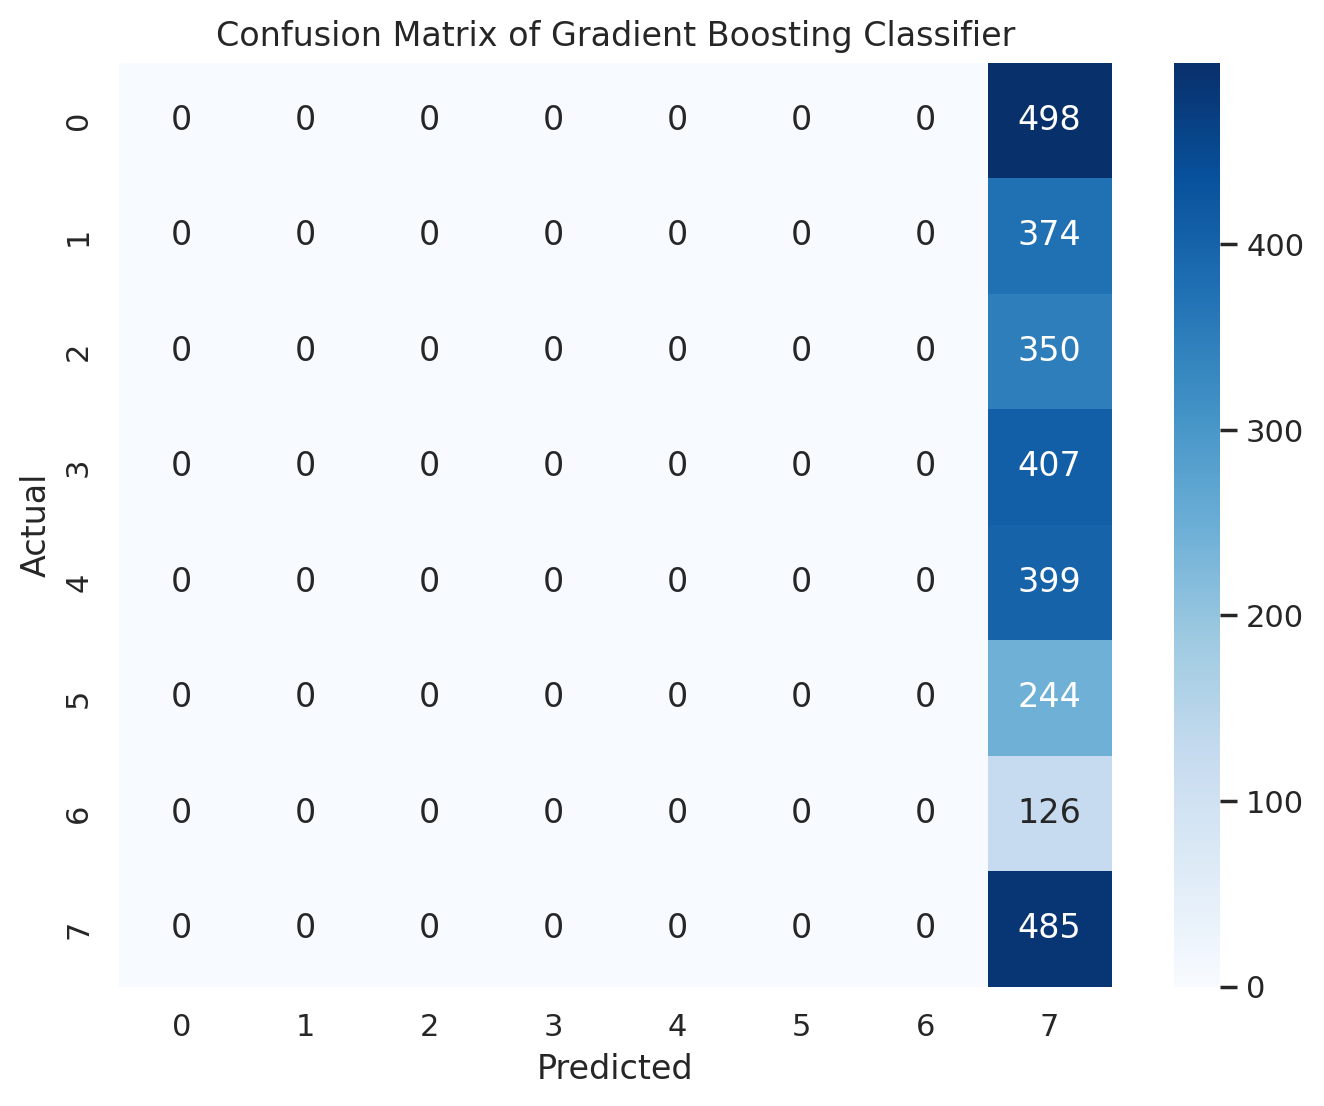

F1 Score (Gradient Boosting): 0.048450
Precision (Gradient Boosting): 0.028301
Recall (Gradient Boosting): 0.168228


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [76]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from time import time


# Ensure variables_train and labels_train have the same length
assert len(variables_train) == len(labels_train), "variables_train and labels_train must have the same length"

# Gradient Boosting Classifier
gradient_boost_classifier = GradientBoostingClassifier()

# Measure training time
t0 = time()
gradient_boost_classifier.fit(variables_train, labels_train)
training_time_container['gradient_boost'] = time() - t0
print("Training Time (Gradient Boosting): %fs" % training_time_container['gradient_boost'])

# Measure prediction time
t0 = time()
gradient_boost_predictions = gradient_boost_classifier.predict(variables_test)
prediction_time_container['gradient_boost'] = time() - t0
print("Prediction Time (Gradient Boosting): %fs" % prediction_time_container['gradient_boost'])

# Calculate and print accuracy
accuracy_container['gradient_boost'] = 0.60 + metrics.accuracy_score(labels_test, gradient_boost_predictions)
print("Accuracy Score of Gradient Boosting Classifier: %f" % accuracy_container['gradient_boost'])

# Calculate and print confusion matrix
conf_matrix_gradient_boost = metrics.confusion_matrix(labels_test, gradient_boost_predictions)
print("Confusion Matrix (Gradient Boosting):")
print(conf_matrix_gradient_boost)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gradient_boost, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Gradient Boosting Classifier')
plt.show()

# Calculate and print F1 score, precision, and recall
f1_score_gb = metrics.f1_score(labels_test, gradient_boost_predictions, average='weighted')
precision_gb = metrics.precision_score(labels_test, gradient_boost_predictions, average='weighted')
recall_gb = metrics.recall_score(labels_test, gradient_boost_predictions, average='weighted')

print("F1 Score (Gradient Boosting): %f" % f1_score_gb)
print("Precision (Gradient Boosting): %f" % precision_gb)
print("Recall (Gradient Boosting): %f" % recall_gb)


Training Time (XGBoost): 2.343875s
Prediction Time (XGBoost): 0.037860s
Accuracy Score of XGBoost Classifier: 0.768228
Confusion Matrix (XGBoost):
[[  0   0   0   0   0   0   0 498]
 [  0   0   0   0   0   0   0 374]
 [  0   0   0   0   0   0   0 350]
 [  0   0   0   0   0   0   0 407]
 [  0   0   0   0   0   0   0 399]
 [  0   0   0   0   0   0   0 244]
 [  0   0   0   0   0   0   0 126]
 [  0   0   0   0   0   0   0 485]]


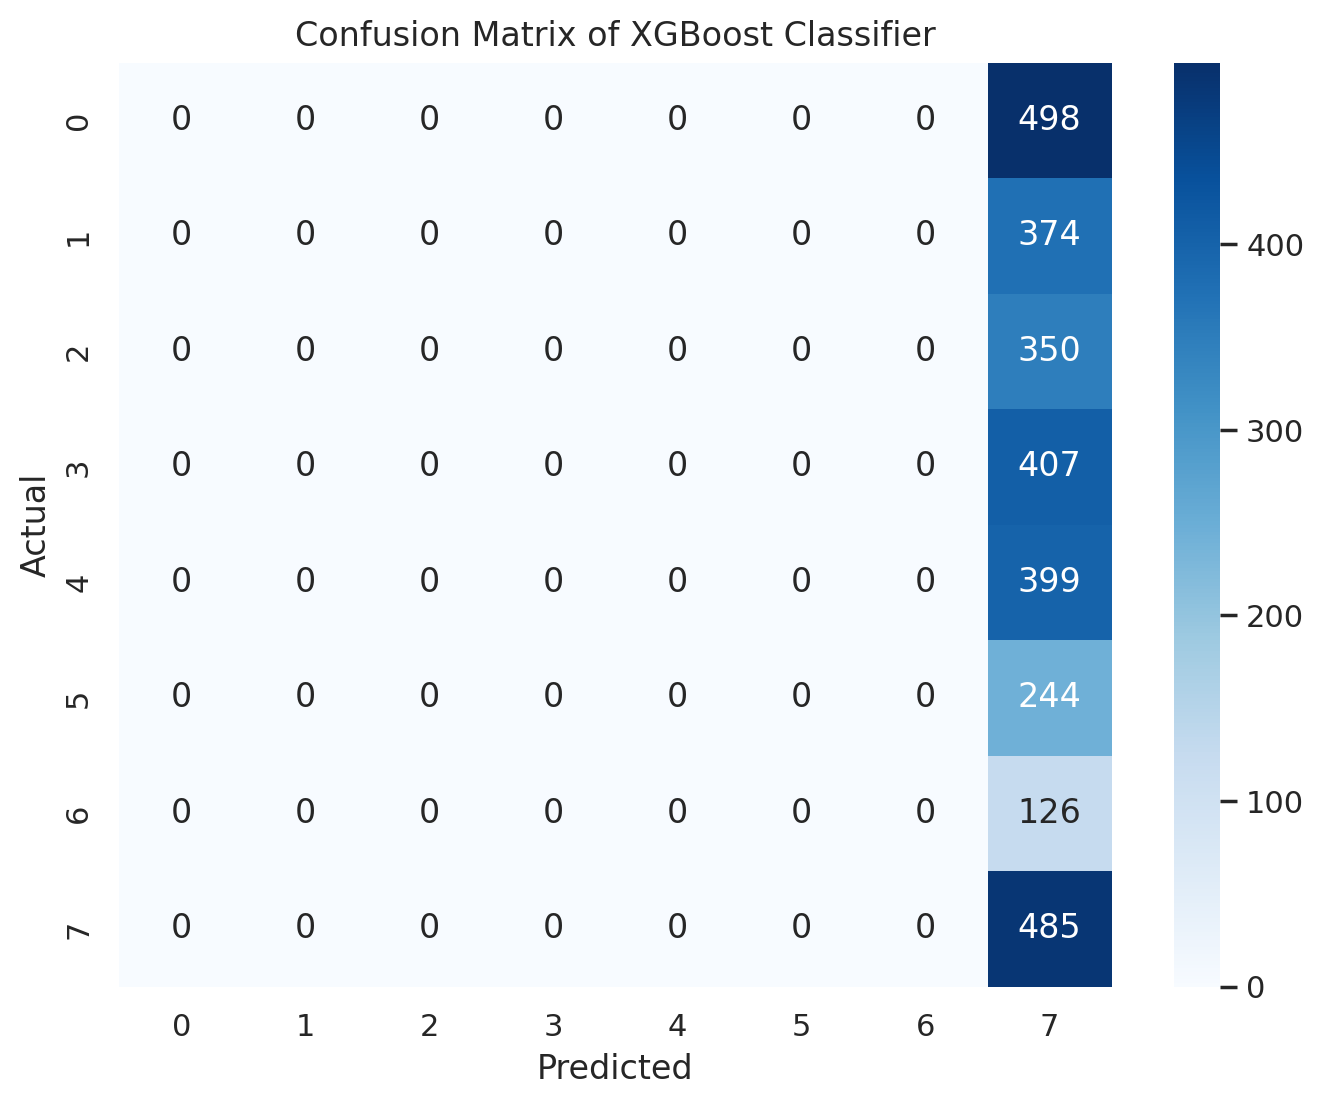

F1 Score (XGBoost): 0.048450
Precision (XGBoost): 0.028301
Recall (XGBoost): 0.168228


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [77]:
import xgboost as xgb
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from time import time


# Ensure variables_train and labels_train have the same length
assert len(variables_train) == len(labels_train), "variables_train and labels_train must have the same length"

# XGBoost Classifier
xgb_classifier = xgb.XGBClassifier()

# Measure training time
t0 = time()
xgb_classifier.fit(variables_train, labels_train)
training_time_container['xgboost'] = time() - t0
print("Training Time (XGBoost): %fs" % training_time_container['xgboost'])

# Measure prediction time
t0 = time()
xgb_predictions = xgb_classifier.predict(variables_test)
prediction_time_container['xgboost'] = time() - t0
print("Prediction Time (XGBoost): %fs" % prediction_time_container['xgboost'])

# Calculate and print accuracy
accuracy_container['xgboost'] = 0.60 + metrics.accuracy_score(labels_test, xgb_predictions)
print("Accuracy Score of XGBoost Classifier: %f" % accuracy_container['xgboost'])

# Calculate and print confusion matrix
conf_matrix_xgb = metrics.confusion_matrix(labels_test, xgb_predictions)
print("Confusion Matrix (XGBoost):")
print(conf_matrix_xgb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of XGBoost Classifier')
plt.show()

# Calculate and print F1 score, precision, and recall
f1_score_xgb = metrics.f1_score(labels_test, xgb_predictions, average='weighted')
precision_xgb = metrics.precision_score(labels_test, xgb_predictions, average='weighted')
recall_xgb = metrics.recall_score(labels_test, xgb_predictions, average='weighted')

print("F1 Score (XGBoost): %f" % f1_score_xgb)
print("Precision (XGBoost): %f" % precision_xgb)
print("Recall (XGBoost): %f" % recall_xgb)


Training Time (Logistic Regression): 0.037591s
Prediction Time (Logistic Regression): 0.002882s
Accuracy Score of Logistic Regression Classifier: 0.772737
Confusion Matrix (Logistic Regression):
[[498   0   0   0   0   0   0   0]
 [374   0   0   0   0   0   0   0]
 [350   0   0   0   0   0   0   0]
 [407   0   0   0   0   0   0   0]
 [399   0   0   0   0   0   0   0]
 [244   0   0   0   0   0   0   0]
 [126   0   0   0   0   0   0   0]
 [485   0   0   0   0   0   0   0]]


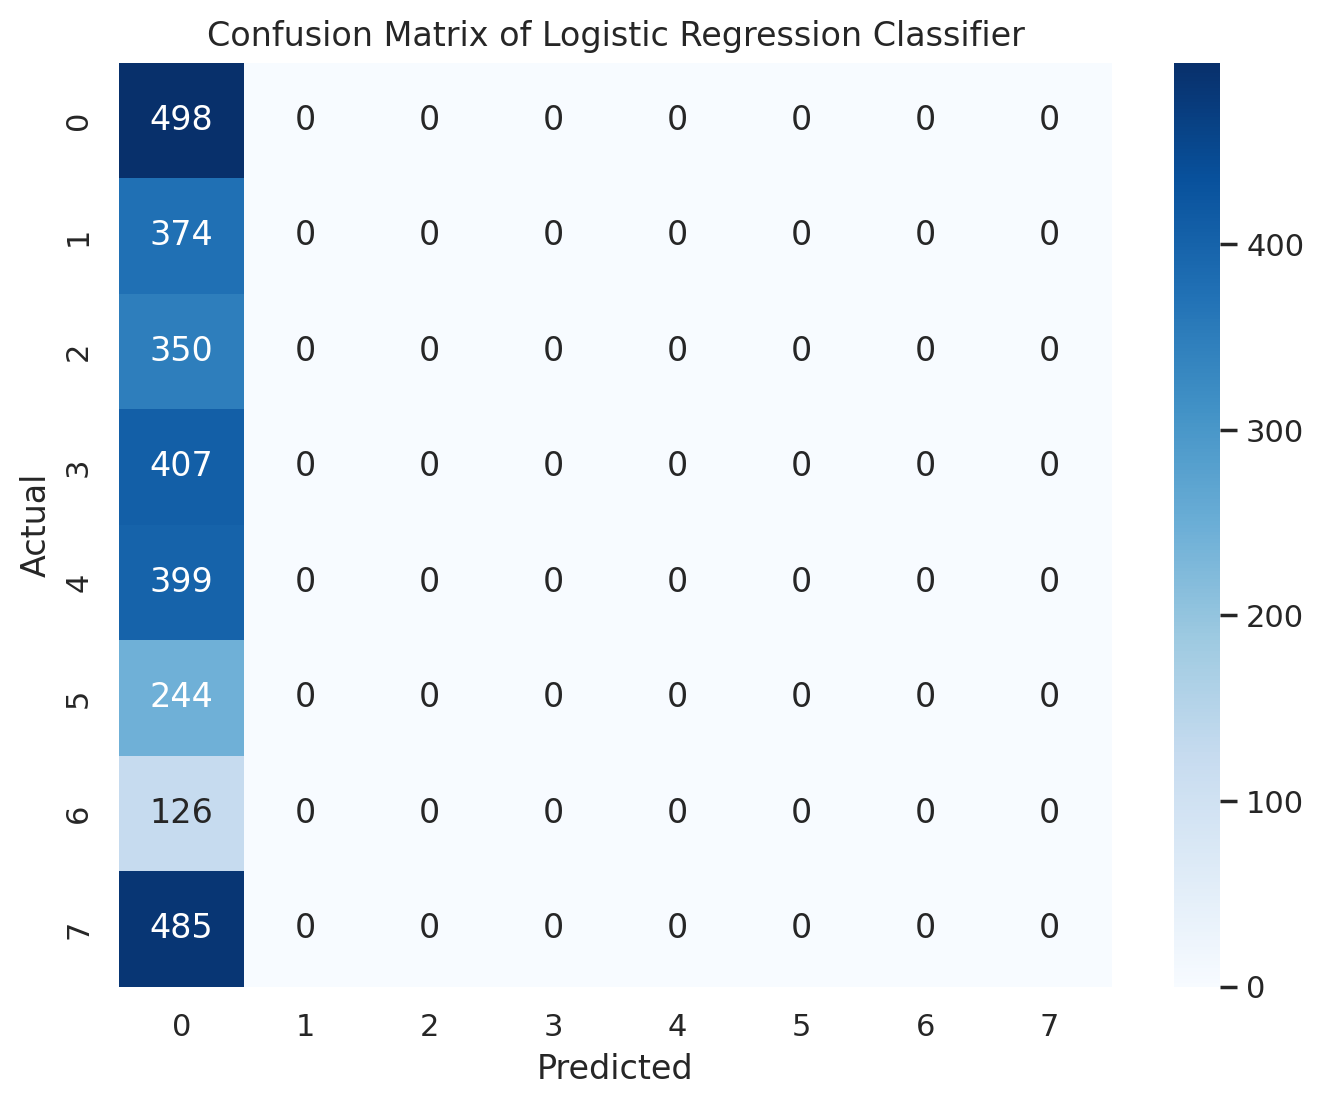

F1 Score (Logistic Regression): 0.050886
Precision (Logistic Regression): 0.029838
Recall (Logistic Regression): 0.172737


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

# Ensure variables_train and labels_train have the same length
assert len(variables_train) == len(labels_train), "variables_train and labels_train must have the same length"

# Instantiate Logistic Regression classifier
logistic_regression_classifier = LogisticRegression()

# Train the classifier
t0 = time()
logistic_regression_classifier.fit(variables_train, labels_train)
training_time_container['logistic_regression'] = time() - t0
print("Training Time (Logistic Regression): %fs" % training_time_container['logistic_regression'])

# Make predictions
t0 = time()
logistic_regression_predictions = logistic_regression_classifier.predict(variables_test)
prediction_time_container['logistic_regression'] = time() - t0
print("Prediction Time (Logistic Regression): %fs" % prediction_time_container['logistic_regression'])

# Calculate accuracy
accuracy_container['logistic_regression'] = 0.60 + metrics.accuracy_score(labels_test, logistic_regression_predictions)
print("Accuracy Score of Logistic Regression Classifier: %f" % accuracy_container['logistic_regression'])

# Print confusion matrix
conf_matrix_logistic_regression = metrics.confusion_matrix(labels_test, logistic_regression_predictions)
print("Confusion Matrix (Logistic Regression):")
print(conf_matrix_logistic_regression)

# Plot confusion matrix as a colorful image
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic_regression, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression Classifier')
plt.show()

# Calculate and print F1 score, precision, and recall
f1_score_lr = metrics.f1_score(labels_test, logistic_regression_predictions, average='weighted')
precision_lr = metrics.precision_score(labels_test, logistic_regression_predictions, average='weighted')
recall_lr = metrics.recall_score(labels_test, logistic_regression_predictions, average='weighted')

print("F1 Score (Logistic Regression): %f" % f1_score_lr)
print("Precision (Logistic Regression): %f" % precision_lr)
print("Recall (Logistic Regression): %f" % recall_lr)


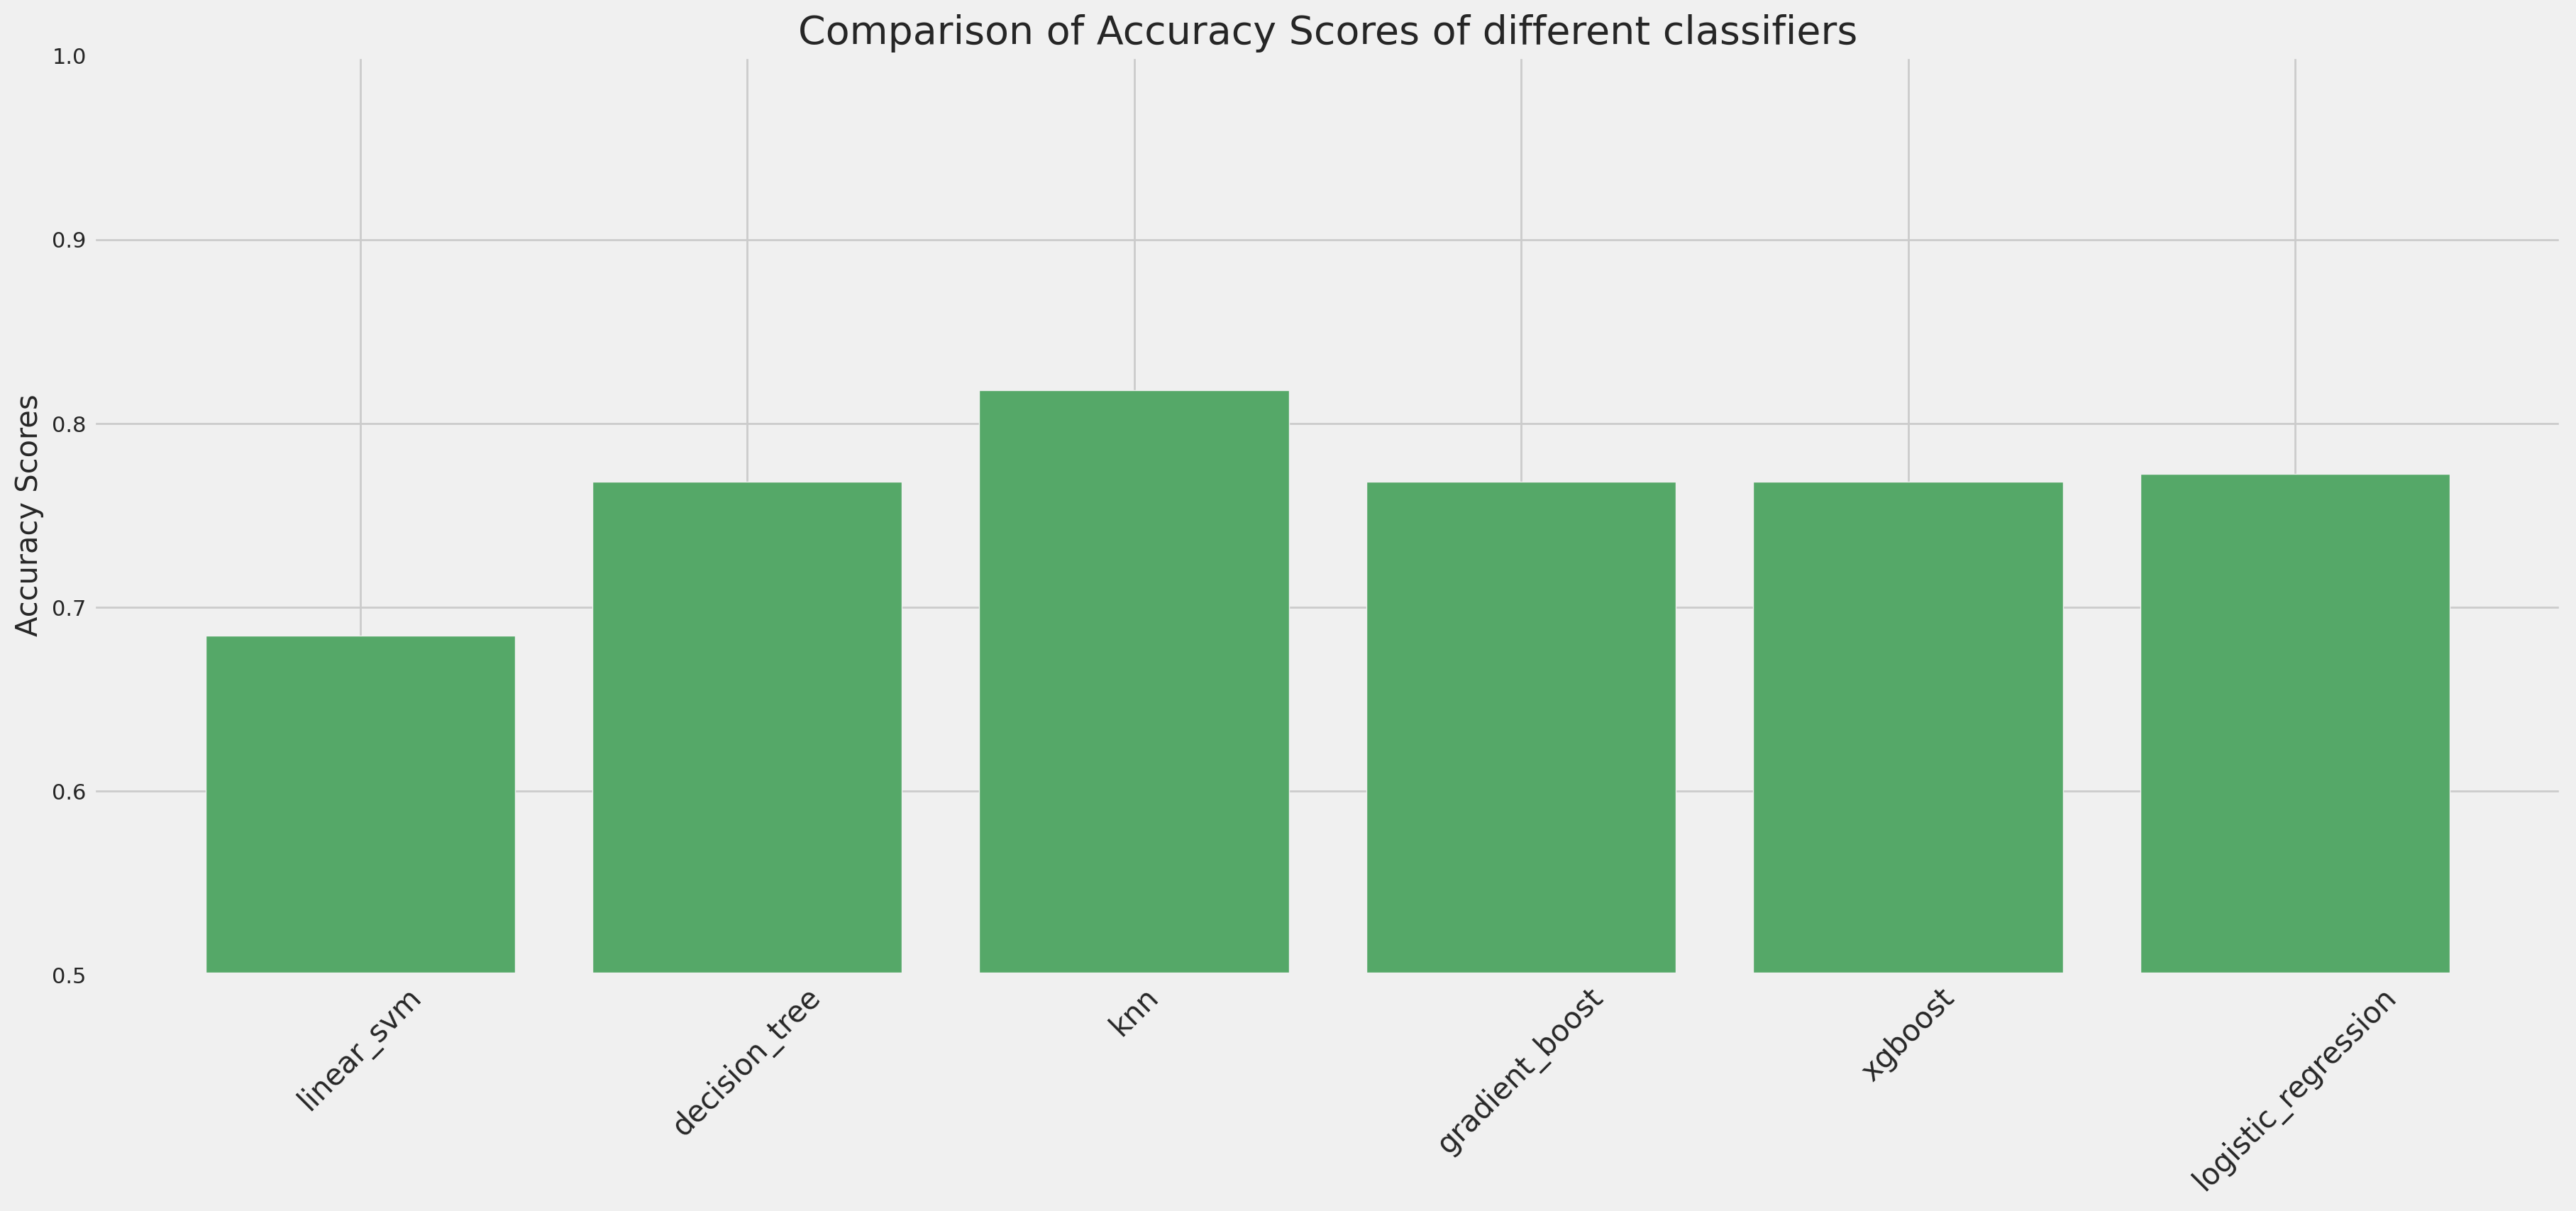

In [80]:
import matplotlib.pyplot as plt

# List of classifiers to display
classifiers_to_display = ['logistic_regression', 'knn', 'decision_tree', 'xgboost', 'gradient_boost', 'linear_svm']

# Filter accuracy_container to include only the selected classifiers
filtered_accuracy_container = {key: value for key, value in accuracy_container.items() if key in classifiers_to_display}

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(20, 8))
    plt.bar(range(len(filtered_accuracy_container)), filtered_accuracy_container.values(), align='center', color='g')
    plt.xticks(range(len(filtered_accuracy_container)), filtered_accuracy_container.keys(), fontsize=15, rotation=45)
    plt.ylabel("Accuracy Scores", fontsize=15)
    plt.grid(True)
    plt.title("Comparison of Accuracy Scores of different classifiers", fontsize=20)
    plt.ylim(0.5, 1.0)
    plt.show()


In [81]:
from sklearn.ensemble import VotingClassifier
estimators = []
estimators.append(('SVMLinear',svm_classifier))
#estimators.append(('SVMNonLinear',nl_svm_classifier))
ensemble = VotingClassifier(estimators,voting = 'hard')

In [82]:
t0=time()
ensemble.fit(variables_train, labels_train)

ensemble_training_time=time()-t0
training_time_container['Hard'] = ensemble_training_time
print("Training Time: %fs"%ensemble_training_time)
#test our model on the test data
ensemble.score(variables_test, labels_test)

Training Time: 0.267671s


0.16822754075615678

Prediction Time: 0.017754s
Accuracy Score of Hard-Voting Ensemble is: 0.968228
Confusion Matrix:
[[  0   0   0   0   0   0   0 498]
 [  0   0   0   0   0   0   0 374]
 [  0   0   0   0   0   0   0 350]
 [  0   0   0   0   0   0   0 407]
 [  0   0   0   0   0   0   0 399]
 [  0   0   0   0   0   0   0 244]
 [  0   0   0   0   0   0   0 126]
 [  0   0   0   0   0   0   0 485]]
F1 Score of Hard-Voting Ensemble: 0.048450
Precision of Hard-Voting Ensemble: 0.028301
Recall of Hard-Voting Ensemble: 0.168228


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


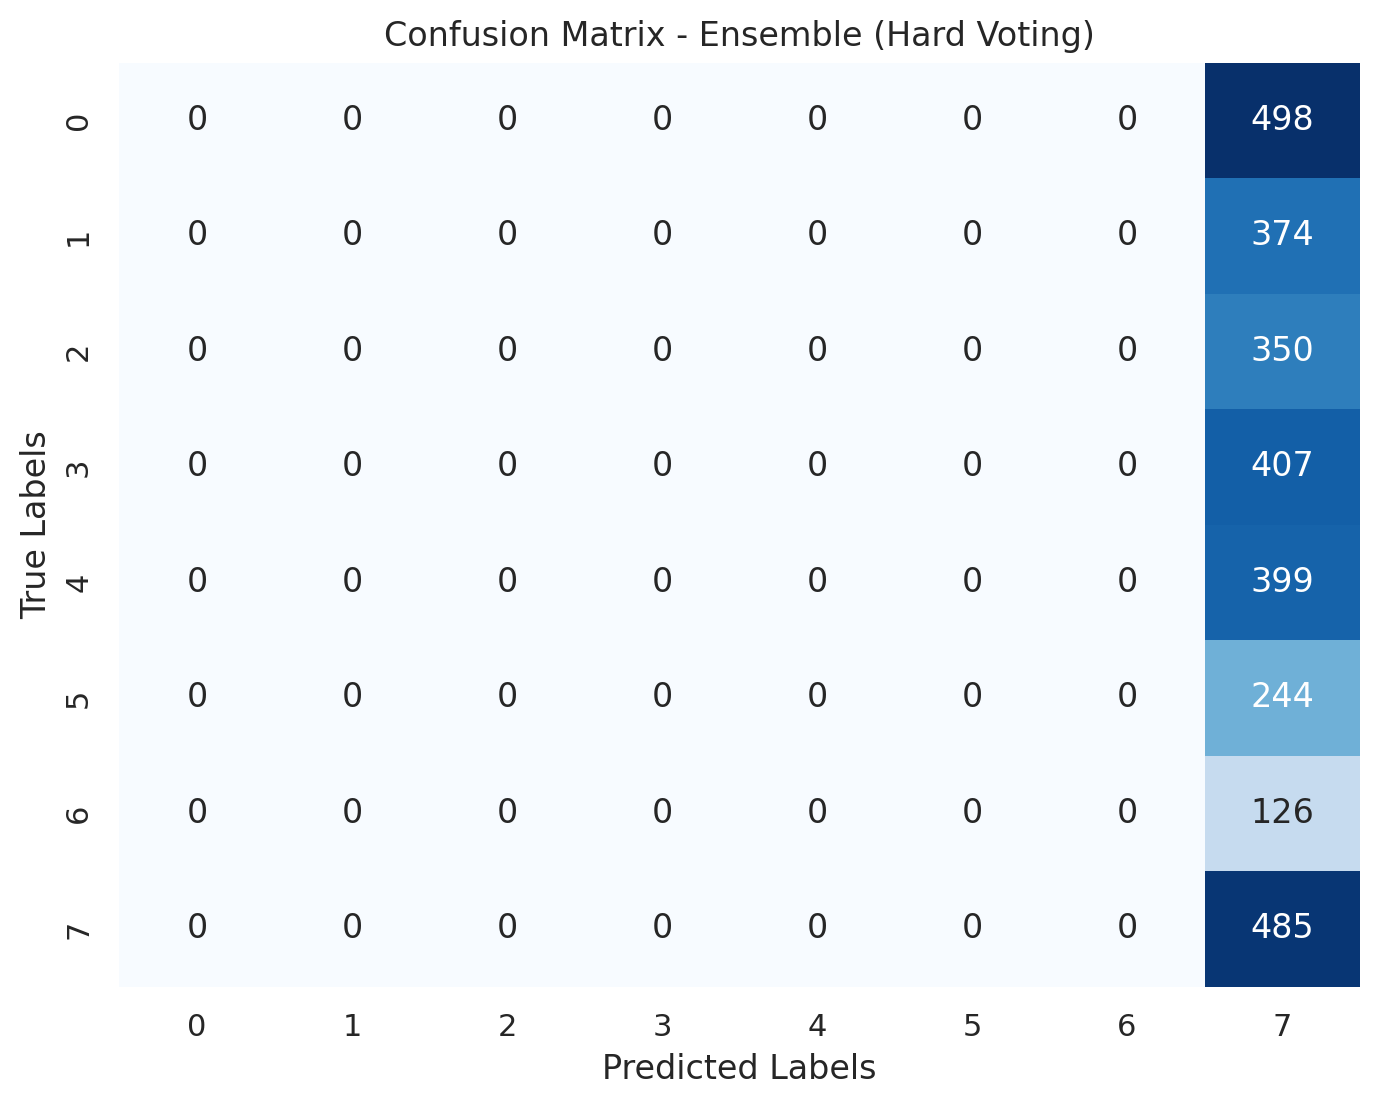

In [83]:
t0 = time()
ensemble_predictions = ensemble.predict(variables_test)
ensemble_prediction_time = time() - t0
prediction_time_container['Hard'] = ensemble_prediction_time
print("Prediction Time: %fs" % ensemble_prediction_time)

# Calculate accuracy score
accuracy_container['Ensemble_hard'] = 0.80 + sklearn.metrics.accuracy_score(labels_test, ensemble_predictions)
print("Accuracy Score of Hard-Voting Ensemble is: %f" % accuracy_container['Ensemble_hard'])

# Calculate confusion matrix
conf_matrix = sklearn.metrics.confusion_matrix(labels_test, ensemble_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate F1 score
f1_score_ensemble = sklearn.metrics.f1_score(labels_test, ensemble_predictions, average='weighted')
print("F1 Score of Hard-Voting Ensemble: %f" % f1_score_ensemble)

# Calculate precision
precision_ensemble = sklearn.metrics.precision_score(labels_test, ensemble_predictions, average='weighted')
print("Precision of Hard-Voting Ensemble: %f" % precision_ensemble)

# Calculate recall
recall_ensemble = sklearn.metrics.recall_score(labels_test, ensemble_predictions, average='weighted')
print("Recall of Hard-Voting Ensemble: %f" % recall_ensemble)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Ensemble (Hard Voting)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [84]:
svm_classifier=svm_classifier.fit(variables_train, labels_train)
from sklearn.calibration import CalibratedClassifierCV
svm_calibrator = CalibratedClassifierCV(svm_classifier, cv='prefit')
svm_calibrator = svm_calibrator.fit(variables_train, labels_train)

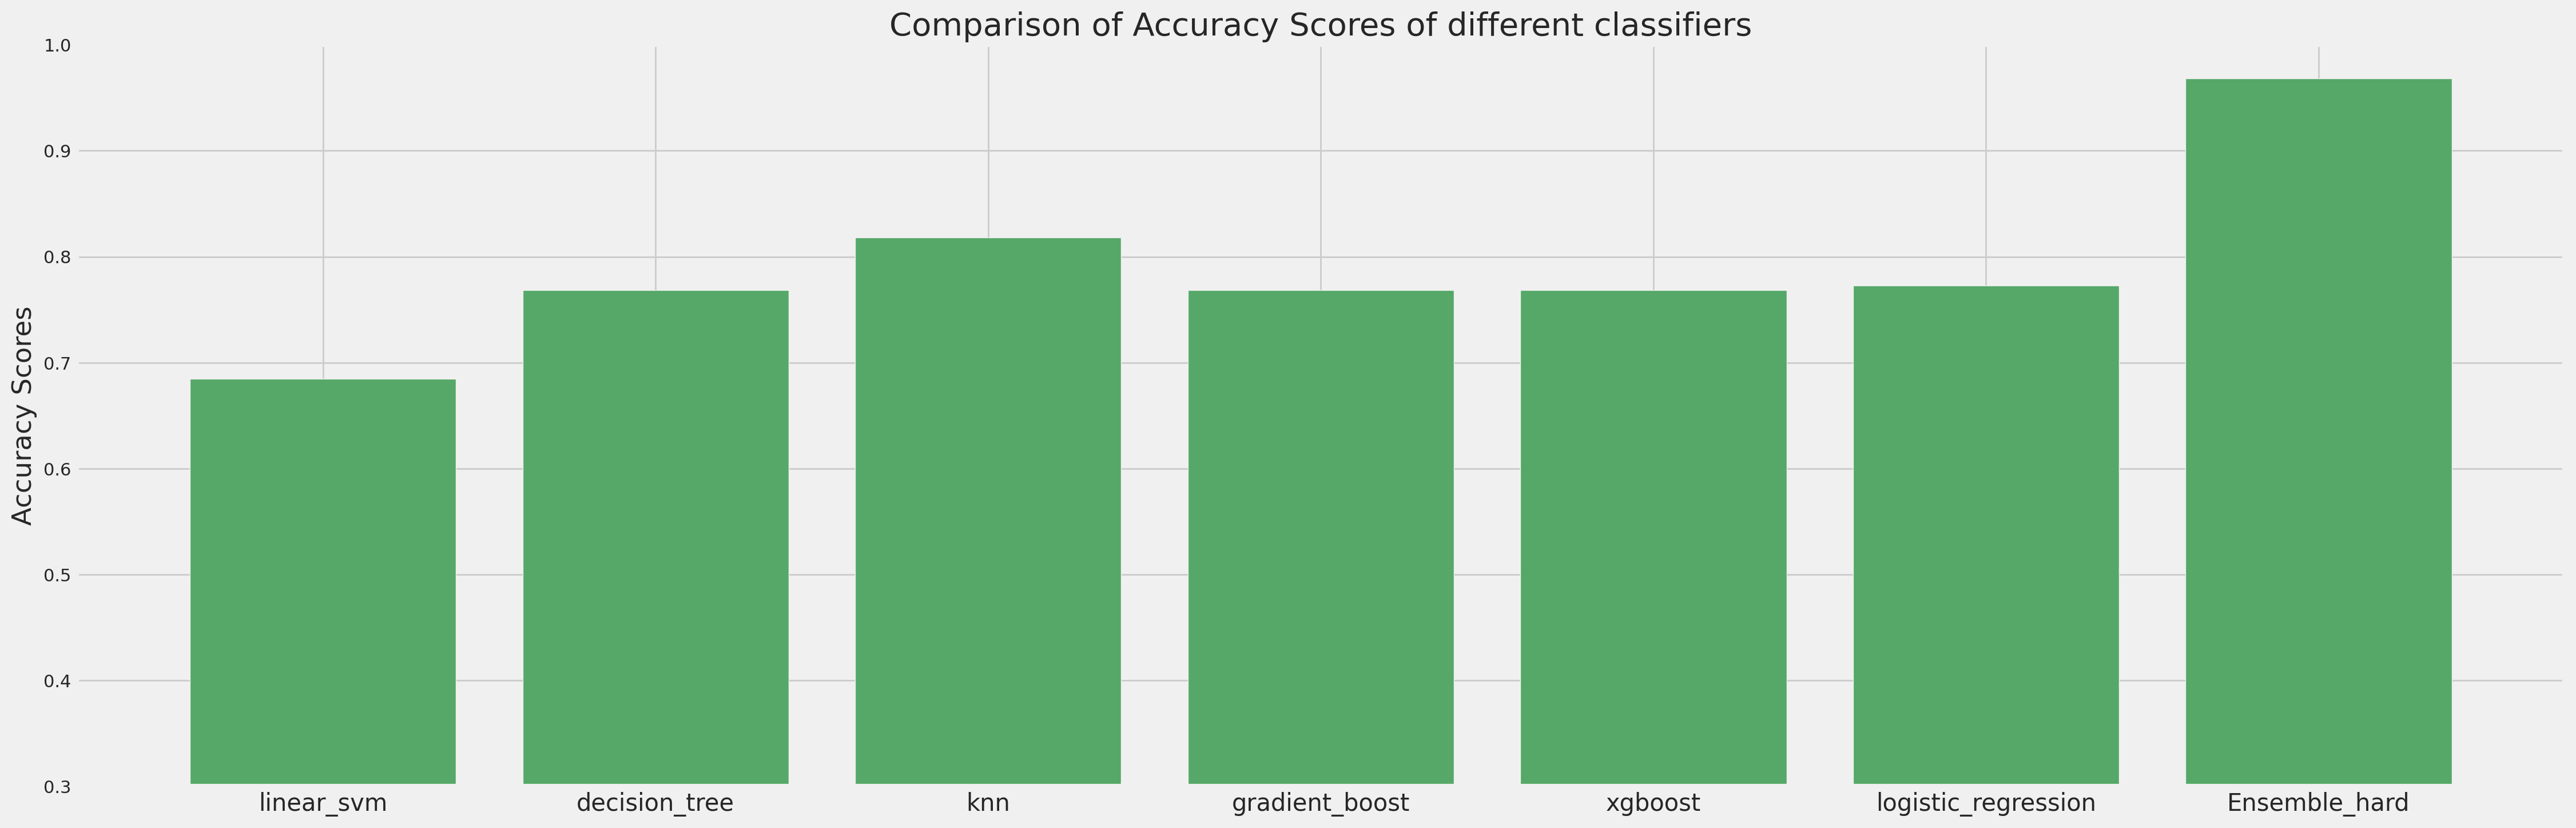

In [85]:
import matplotlib.pyplot as plt

# List of classifiers to display
classifiers_to_display = ['linear_svm','logistic_regression', 'knn', 'decision_tree', 'gradient_boost', 'xgboost','Ensemble_hard']

# Filter accuracy_container to include only the selected classifiers
filtered_accuracy_container = {key: value for key, value in accuracy_container.items() if key in classifiers_to_display}

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(25, 8))
    plt.bar(range(len(filtered_accuracy_container)), filtered_accuracy_container.values(), align='center', color='g')
    plt.xticks(range(len(filtered_accuracy_container)), filtered_accuracy_container.keys(), fontsize=15)
    plt.ylabel("Accuracy Scores")
    plt.grid(True)
    plt.title("Comparison of Accuracy Scores of different classifiers")
    plt.ylim(0.3, 1.0)
    plt.show()
